In [82]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pylab import rcParams
from sklearn.metrics import mean_squared_error

In [83]:
#Reading all datasets only columns date, Adj Close, Volume
AAL = pd.read_csv("AAL.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
AAL= AAL.rename(columns={'Adj Close':"AAL_Close", 'Volume':"AAL_Vol"})

AAPL = pd.read_csv("AAPL.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
AAPL= AAPL.rename(columns={'Adj Close':"AAPL_Close", 'Volume':"AAPL_Vol"})

ALK = pd.read_csv("ALK.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
ALK= ALK.rename(columns={'Adj Close':"ALK_Close", 'Volume':"ALK_Vol"})

AMZN = pd.read_csv("AMZN.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
AMZN= AMZN.rename(columns={'Adj Close':"AMZN_Close", 'Volume':"AMZN_Vol"})

BHC = pd.read_csv("BHC.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
BHC= BHC.rename(columns={'Adj Close':"BHC_Close", 'Volume':"BHC_Vol"})
CS = pd.read_csv("CS.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
CS= CS.rename(columns={'Adj Close':"CS_Close", 'Volume':"CS_Vol"})

DB = pd.read_csv("DB.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
DB= DB.rename(columns={'Adj Close':"DB_Close", 'Volume':"DB_Vol"})

GOOG = pd.read_csv("GOOG.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
GOOG= GOOG.rename(columns={'Adj Close':"GOOG_Close", 'Volume':"GOOG_Vol"})

GS = pd.read_csv("GS.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
GS= GS.rename(columns={'Adj Close':"GS_Close", 'Volume':"GS_Vol"})
HA = pd.read_csv("HA.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
HA= HA.rename(columns={'Adj Close':"HA_Close", 'Volume':"HA_Vol"})

JNJ = pd.read_csv("JNJ.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
JNJ= JNJ.rename(columns={'Adj Close':"JNJ_Close", 'Volume':"JNJ_Vol"})

MRK = pd.read_csv("MRK.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
MRK= MRK.rename(columns={'Adj Close':"MRK_Close", 'Volume':"MRK_Vol"})

SP500 = pd.read_csv("SP500.csv", parse_dates=False, index_col="Date",usecols=['Date', 'Adj Close', 'Volume'],header=0)
SP500= SP500.rename(columns={'Adj Close':"SP500_Close", 'Volume':"SP500_Vol"})

AAL.shape

(2517, 2)

In [84]:
#Merging all the datasets together using left join.
df = [AAL, AAPL, ALK, AMZN, BHC, CS, DB, GOOG,GS, HA, JNJ, MRK, SP500]
stocks = AAL
for i in range(1,len(df)):
    stocks=pd.merge(stocks, df[i], how="left", on='Date')
stocks.shape

(2517, 26)

In [85]:
stocks.head()

AAL_Close  AAL_Vol  AAPL_Close   AAPL_Vol  ALK_Close    ALK_Vol  \
Date                                                                          
01-10-2010   8.758067  3603800    8.719163  448142800  10.972344  1663600.0   
04-10-2010   8.597802  3856800    8.599421  435302000  10.703489  1512400.0   
05-10-2010   8.701504  3896600    8.917298  501967200  10.767396  2567200.0   
06-10-2010   8.701504  3230200    8.925013  670868800  10.743157  1043600.0   
07-10-2010   8.710930  3877700    8.925941  408399600  10.247319  7682400.0   

            AMZN_Close   AMZN_Vol  BHC_Close    BHC_Vol  ...    GS_Close  \
Date                                                     ...               
01-10-2010  153.710007  8683400.0  24.757708  5778700.0  ...  127.147858   
04-10-2010  155.389999  5346500.0  24.873083  4187200.0  ...  126.175117   
05-10-2010  160.869995  5620000.0  25.286512  4610300.0  ...  128.757706   
06-10-2010  155.399994  6060800.0  25.661484  4448900.0  ...  129.850906   
07-10-2010  156.270004  4622000.0  25.574951  2453900.0  ...  130.083435   

               GS_Vol  HA_Close     HA_Vol  JNJ_Close     JNJ_Vol  MRK_Close  \
Date                                                                           
01-10-2010  7439800.0  5.742526   645400.0  45.970119   9773200.0  26.052284   
04-10-2010  5866700.0  5.540189   618900.0  45.910553   8703600.0  25.995331   
05-10-2010  8724700.0  5.636539   534800.0  46.751797  12439400.0  26.351234   
06-10-2010  6330600.0  5.752162  2563900.0  47.057022  11339800.0  26.344130   
07-10-2010  4471500.0  5.925593  1115200.0  47.064480   9826600.0  26.130579   

               MRK_Vol  SP500_Close   SP500_Vol  
Date                                             
01-10-2010  11741900.0  1146.239990  4298910000  
04-10-2010   9234900.0  1137.030029  3604110000  
05-10-2010  10669200.0  1160.750000  4068840000  
06-10-2010   7541300.0  1159.969971  4073160000  
07-10-2010  13897800.0  1158.060059  3910550000  

[5 rows x 26 columns]

In [86]:
stocks.to_csv('final_dataset.csv') 
#Exporting final dataset to CSV. We checked in CSV that data is clean and does not have any
                                    #Missing value.

In [87]:
stocks.columns

Index(['AAL_Close', 'AAL_Vol', 'AAPL_Close', 'AAPL_Vol', 'ALK_Close',
       'ALK_Vol', 'AMZN_Close', 'AMZN_Vol', 'BHC_Close', 'BHC_Vol', 'CS_Close',
       'CS_Vol', 'DB_Close', 'DB_Vol', 'GOOG_Close', 'GOOG_Vol', 'GS_Close',
       'GS_Vol', 'HA_Close', 'HA_Vol', 'JNJ_Close', 'JNJ_Vol', 'MRK_Close',
       'MRK_Vol', 'SP500_Close', 'SP500_Vol'],
      dtype='object')

In [88]:
#Taking only Close Price columns for further study:
close_dataset = stocks[['AAL_Close','AAPL_Close','ALK_Close','AMZN_Close','BHC_Close','CS_Close',
                        'DB_Close','GOOG_Close','GS_Close','HA_Close','JNJ_Close','MRK_Close','SP500_Close']]

In [89]:
##Taking only volume columns for further study:
vol_dataset = stocks[['AAL_Vol','AAPL_Vol','ALK_Vol','AMZN_Vol','BHC_Vol','CS_Vol',
                        'DB_Vol','GOOG_Vol','GS_Vol','HA_Vol','JNJ_Vol','MRK_Vol','SP500_Vol']]

In [90]:
close_dataset.head()

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  \
Date                                                                  
01-10-2010   8.758067    8.719163  10.972344  153.710007  24.757708   
04-10-2010   8.597802    8.599421  10.703489  155.389999  24.873083   
05-10-2010   8.701504    8.917298  10.767396  160.869995  25.286512   
06-10-2010   8.701504    8.925013  10.743157  155.399994  25.661484   
07-10-2010   8.710930    8.925941  10.247319  156.270004  25.574951   

             CS_Close   DB_Close  GOOG_Close    GS_Close  HA_Close  JNJ_Close  \
Date                                                                            
01-10-2010  30.167257  44.981487  261.828613  127.147858  5.742526  45.970119   
04-10-2010  29.943998  44.263348  260.199707  126.175117  5.540189  45.910553   
05-10-2010  30.830046  46.140301  268.110046  128.757706  5.636539  46.751797   
06-10-2010  31.032362  46.703384  266.177307  129.850906  5.752162  47.057022   
07-10-2010  31.199810  46.213741  264.015411  130.083435  5.925593  47.064480   

            MRK_Close  SP500_Close  
Date                                
01-10-2010  26.052284  1146.239990  
04-10-2010  25.995331  1137.030029  
05-10-2010  26.351234  1160.750000  
06-10-2010  26.344130  1159.969971  
07-10-2010  26.130579  1158.060059

In [91]:
# Daily return from each stock 
daily_return_stocks = close_dataset.pct_change()
daily_return_stocks.head(5)

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  CS_Close  \
Date                                                                            
01-10-2010        NaN         NaN        NaN         NaN        NaN       NaN   
04-10-2010  -0.018299   -0.013733  -0.024503    0.010930   0.004660 -0.007401   
05-10-2010   0.012061    0.036965   0.005971    0.035266   0.016622  0.029590   
06-10-2010   0.000000    0.000865  -0.002251   -0.034003   0.014829  0.006562   
07-10-2010   0.001083    0.000104  -0.046154    0.005599  -0.003372  0.005396   

            DB_Close  GOOG_Close  GS_Close  HA_Close  JNJ_Close  MRK_Close  \
Date                                                                         
01-10-2010       NaN         NaN       NaN       NaN        NaN        NaN   
04-10-2010 -0.015965   -0.006221 -0.007650 -0.035235  -0.001296  -0.002186   
05-10-2010  0.042404    0.030401  0.020468  0.017391   0.018324   0.013691   
06-10-2010  0.012204   -0.007209  0.008490  0.020513   0.006529  -0.000270   
07-10-2010 -0.010484   -0.008122  0.001791  0.030151   0.000158  -0.008106   

            SP500_Close  
Date                     
01-10-2010          NaN  
04-10-2010    -0.008035  
05-10-2010     0.020861  
06-10-2010    -0.000672  
07-10-2010    -0.001647

In [92]:
# Dropping the rows with missing values
daily_return_stocks = return_stocks.dropna(axis=0)
daily_return_stocks.head()

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  CS_Close  \
Date                                                                            
04-10-2010  -0.018299   -0.013733  -0.024503    0.010930   0.004660 -0.007401   
05-10-2010   0.012061    0.036965   0.005971    0.035266   0.016622  0.029590   
06-10-2010   0.000000    0.000865  -0.002251   -0.034003   0.014829  0.006562   
07-10-2010   0.001083    0.000104  -0.046154    0.005599  -0.003372  0.005396   
08-10-2010  -0.018398    0.016769   0.036344   -0.004607   0.009023 -0.015653   

            DB_Close  GOOG_Close  GS_Close  HA_Close  JNJ_Close  MRK_Close  \
Date                                                                         
04-10-2010 -0.015965   -0.006221 -0.007650 -0.035235  -0.001296  -0.002186   
05-10-2010  0.042404    0.030401  0.020468  0.017391   0.018324   0.013691   
06-10-2010  0.012204   -0.007209  0.008490  0.020513   0.006529  -0.000270   
07-10-2010 -0.010484   -0.008122  0.001791  0.030151   0.000158  -0.008106   
08-10-2010 -0.003002    0.011962  0.010257  0.000000   0.000158   0.005448   

            SP500_Close  
Date                     
04-10-2010    -0.008035  
05-10-2010     0.020861  
06-10-2010    -0.000672  
07-10-2010    -0.001647  
08-10-2010     0.006122

In [93]:
# Average daily return from each stock
daily_returns_mean = daily_return_stocks.mean().sort_values(ascending =False)
print(daily_returns_mean)

#CS - Credit Suisse and DB - Deutsche Bank have negative daily return, so we will not be selecting these in the portfolio.

AMZN_Close     0.001398
AAPL_Close     0.001185
GOOG_Close     0.000818
HA_Close       0.000780
ALK_Close      0.000760
AAL_Close      0.000660
MRK_Close      0.000545
JNJ_Close      0.000526
SP500_Close    0.000488
BHC_Close      0.000480
GS_Close       0.000350
CS_Close      -0.000193
DB_Close      -0.000320
dtype: float64


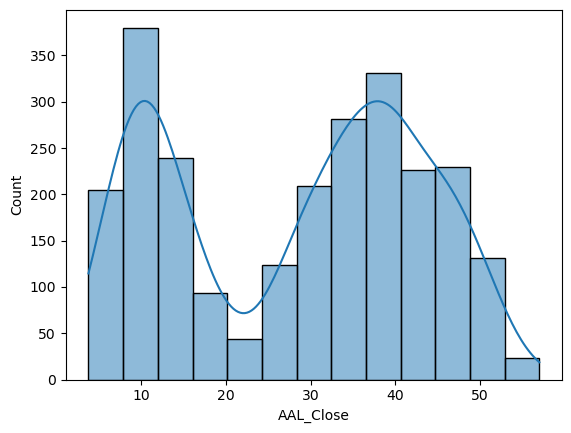

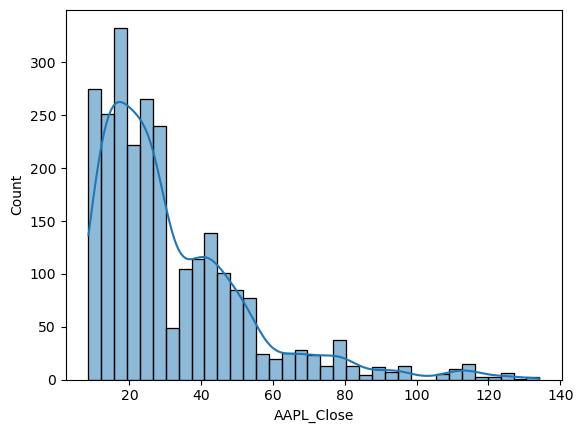

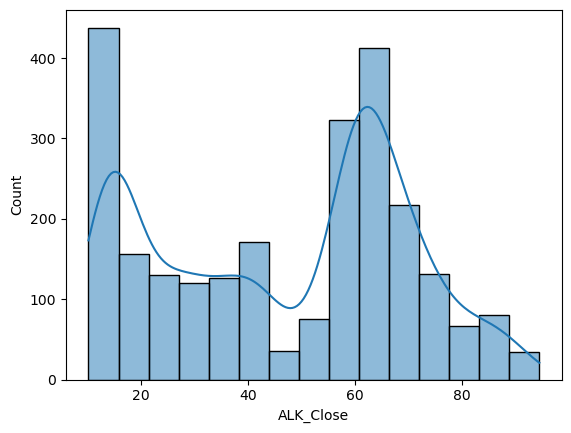

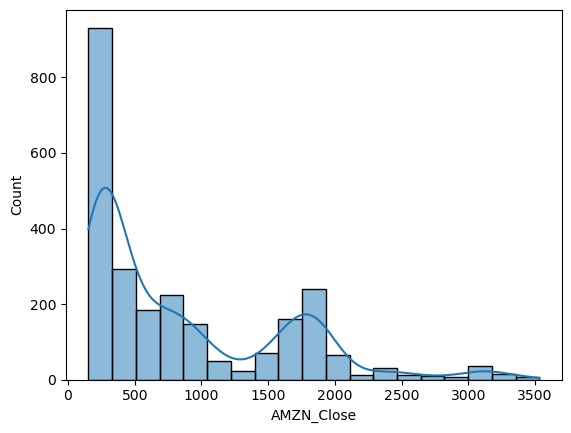

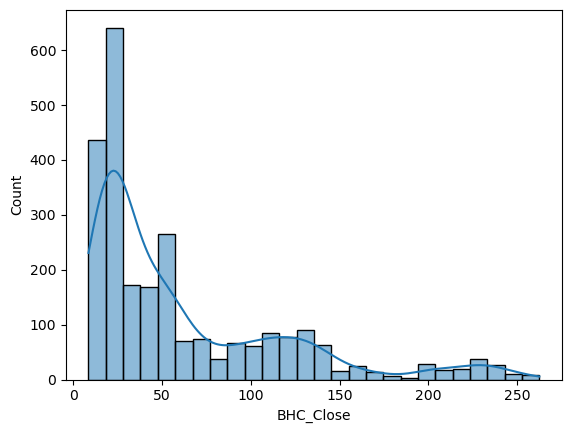

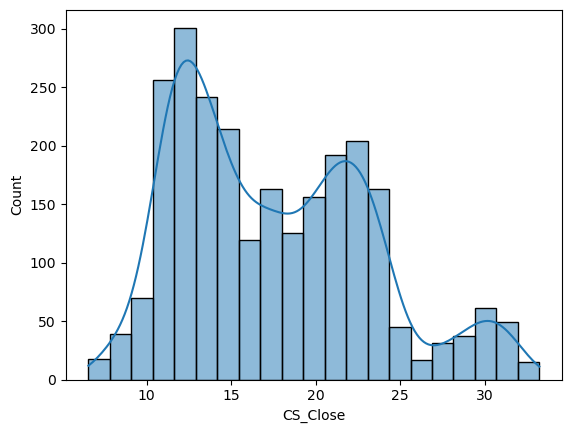

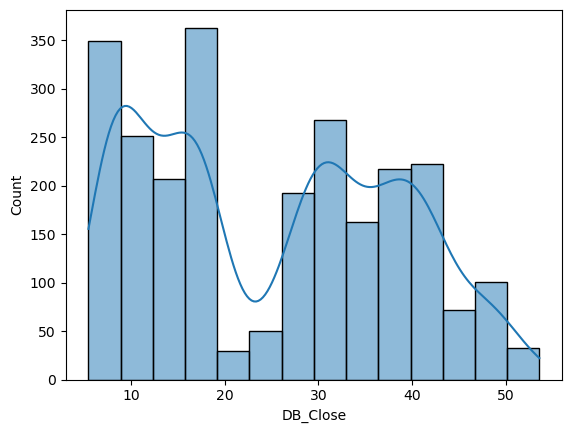

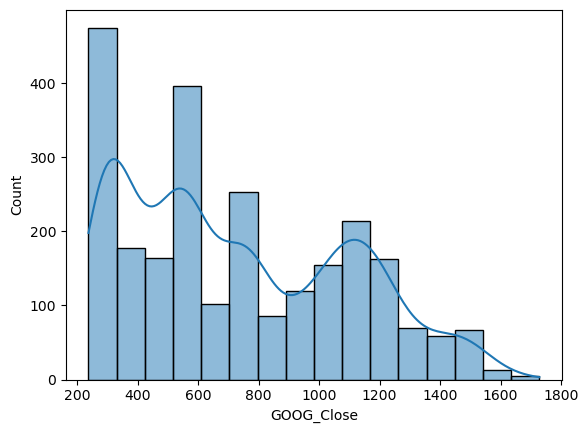

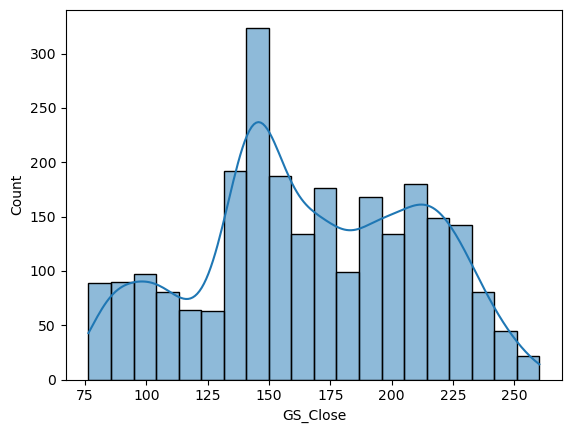

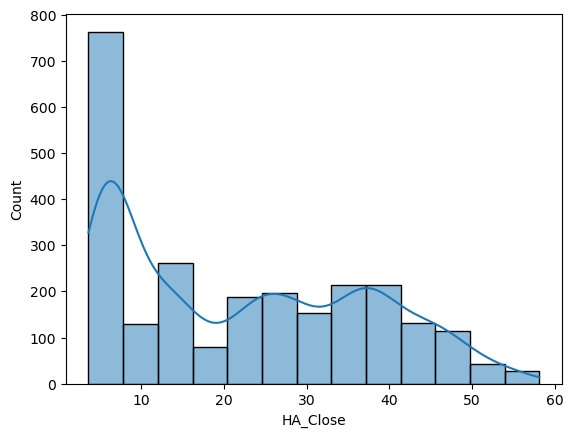

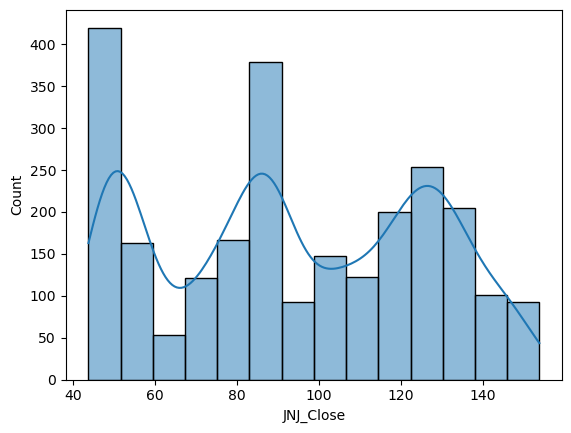

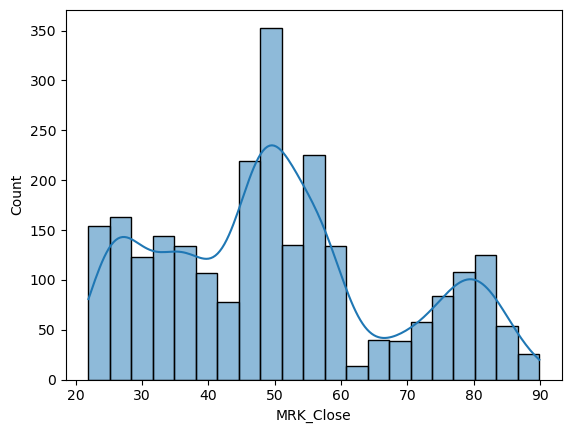

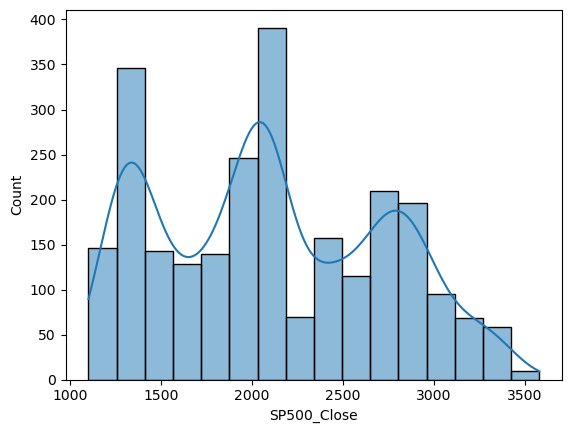

In [94]:
#Distribution of each stock.
list1= return_stocks.columns
for i in range(len(list1)):
    plt.figure()
    sns.histplot(data=final_dataset, x=list1[i], kde=True)
    plt.show

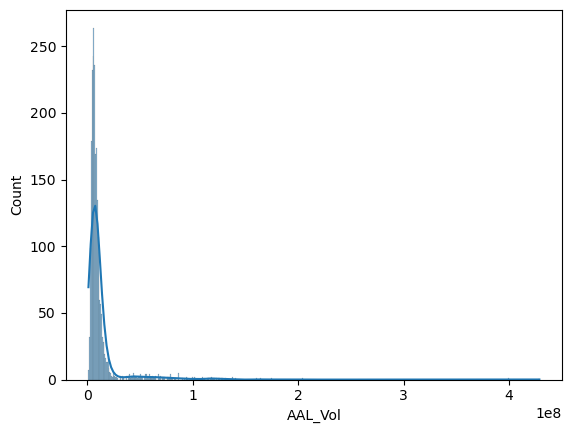

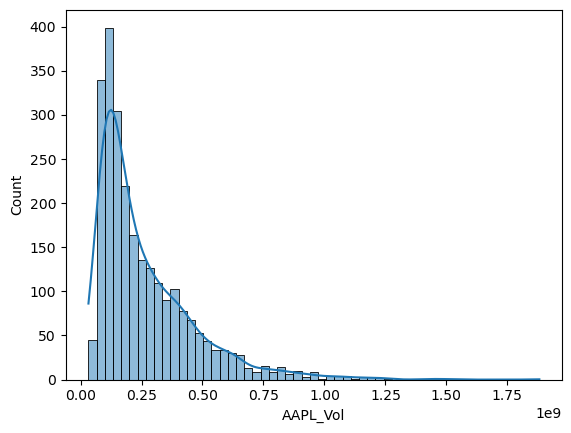

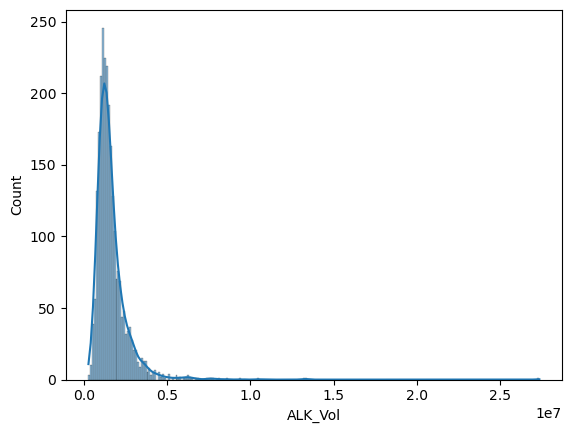

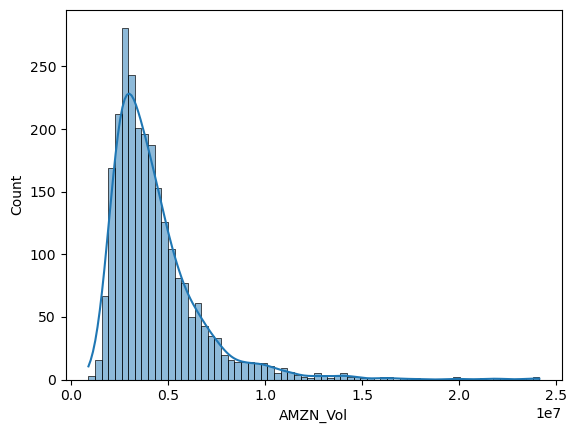

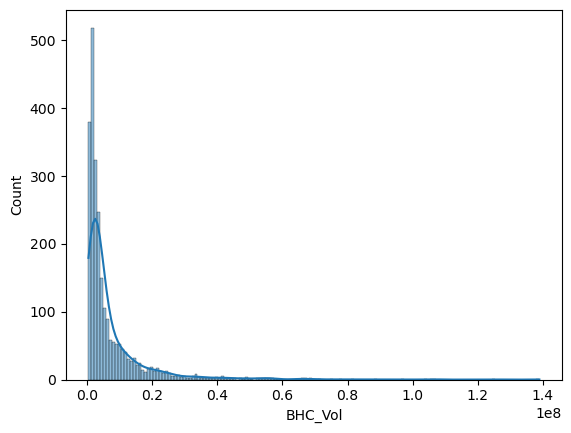

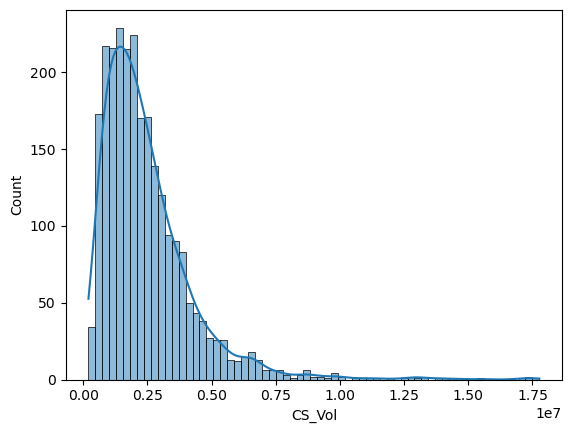

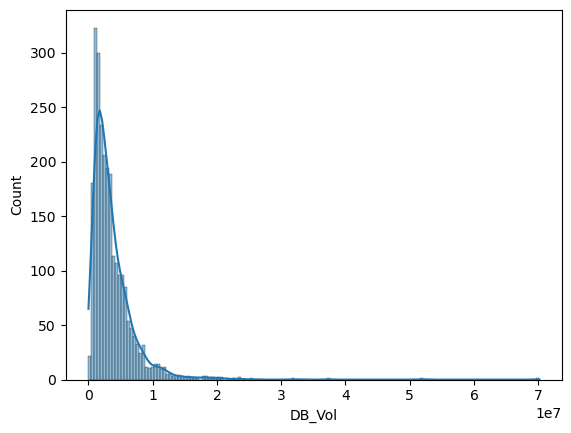

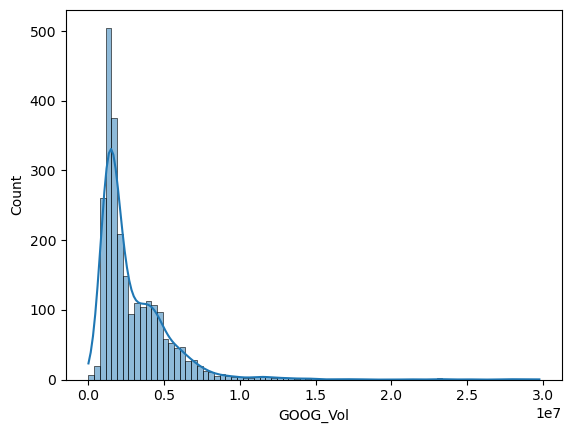

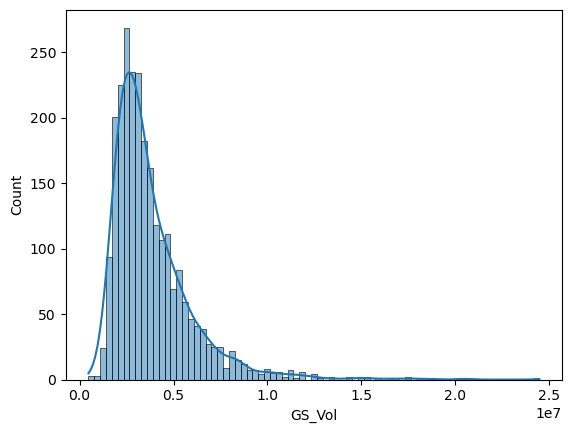

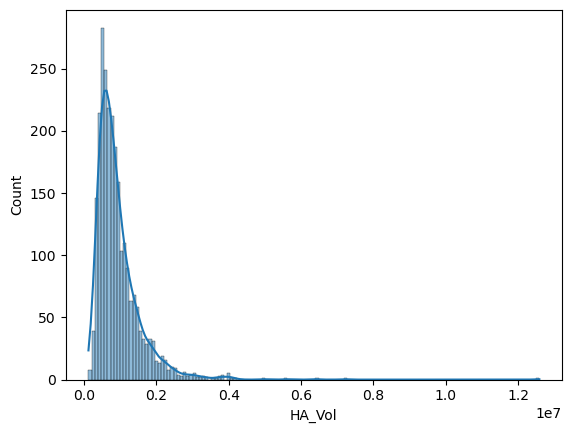

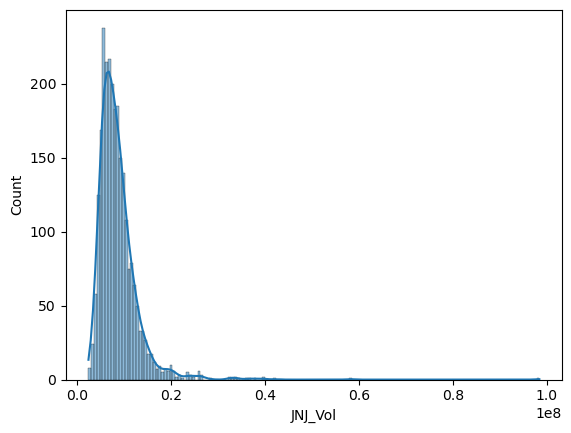

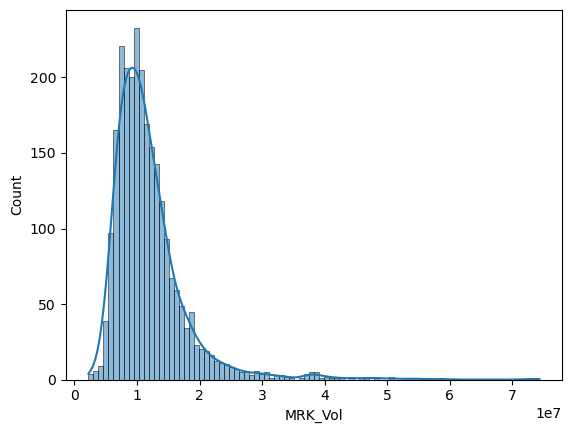

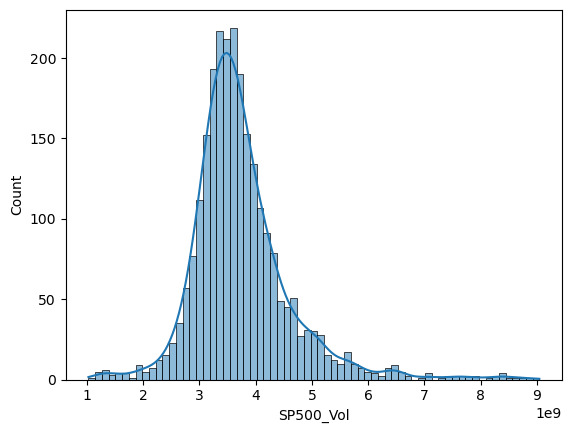

In [95]:
#Distribution of volume of each stock.
list11= vol_dataset.columns
for i in range(len(list11)):
    plt.figure()
    sns.histplot(data=vol_dataset, x=list11[i], kde=True)
    plt.show

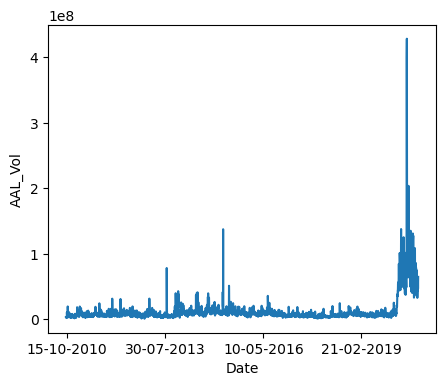

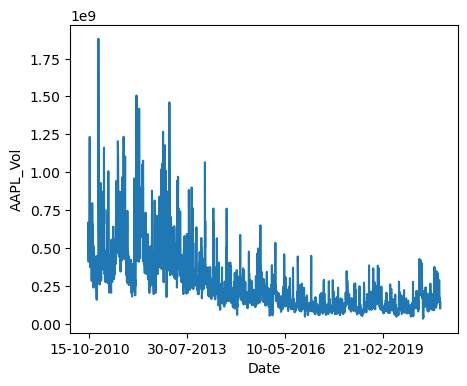

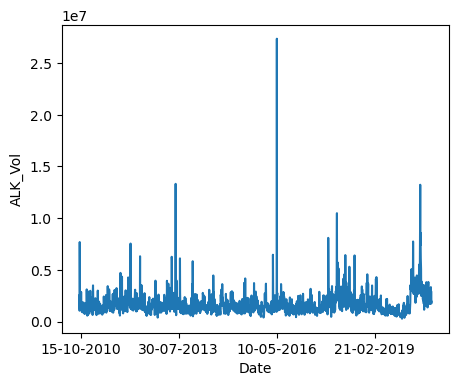

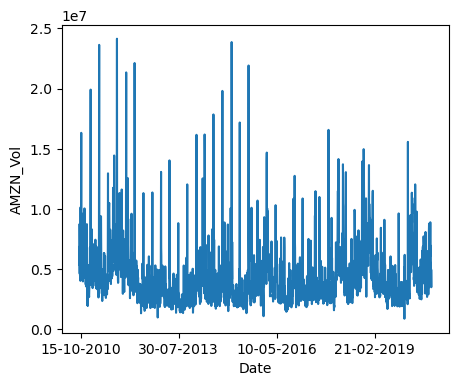

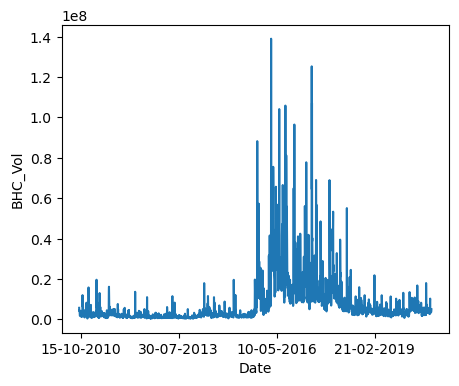

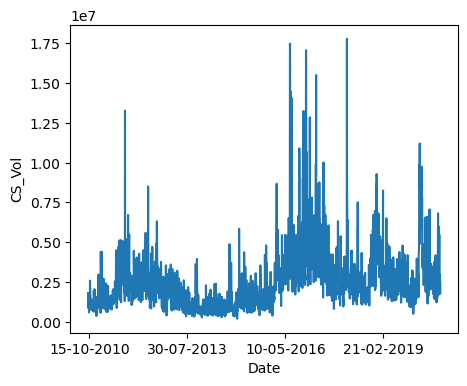

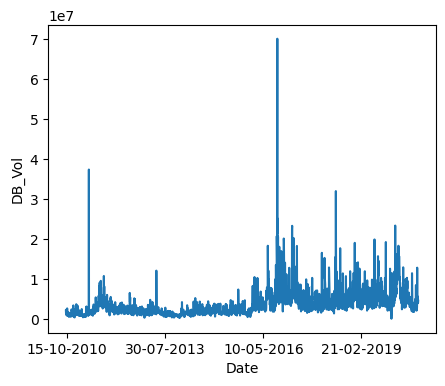

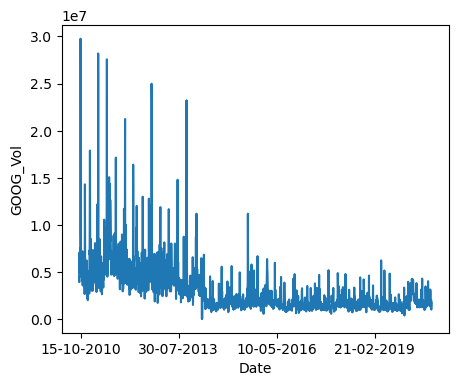

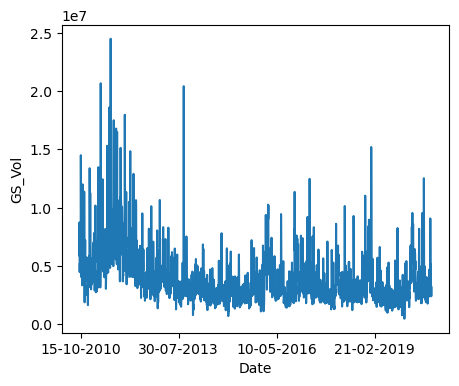

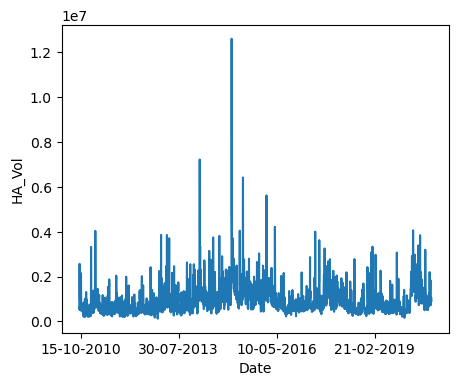

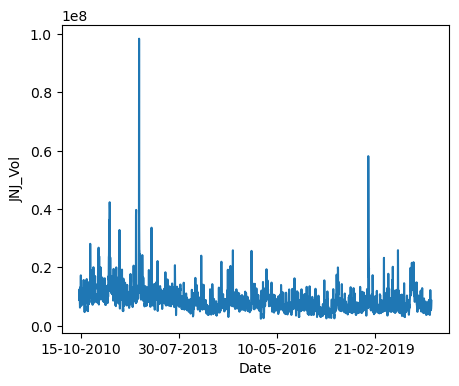

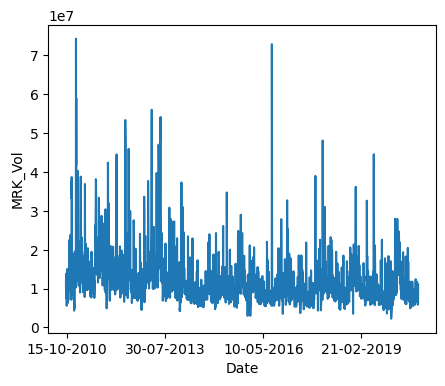

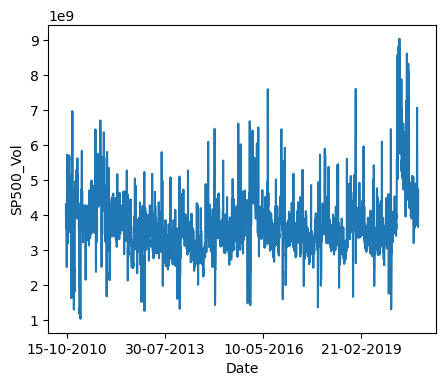

In [96]:
#Trend of volumes traded for each stock for last 10 years.
#This is showing the difference in volumes traded daily and the increase and decrease in same.
for i in list11:
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=vol_dataset[i])
    plt.xticks(np.arange(10, 2600, step=700))
    plt.show()


In [97]:
final_dataset.max().sort_values(ascending =False) # Max Values of stocks.


SP500_Close    3580.840088
AMZN_Close     3531.449951
GOOG_Close     1728.280029
BHC_Close       262.519989
GS_Close        260.138916
JNJ_Close       153.830002
AAPL_Close      134.179993
ALK_Close        94.471420
MRK_Close        89.912033
HA_Close         58.099716
AAL_Close        56.988728
DB_Close         53.558323
CS_Close         33.230030
dtype: float64

In [98]:
final_dataset.min().sort_values(ascending =False)  # Min Values of stocks.

SP500_Close    1099.229980
GOOG_Close      236.553345
AMZN_Close      153.029999
GS_Close         76.414085
JNJ_Close        43.686241
MRK_Close        21.931190
ALK_Close        10.242908
AAPL_Close        8.599421
BHC_Close         8.510000
CS_Close          6.552680
DB_Close          5.480000
AAL_Close         3.770966
HA_Close          3.642072
dtype: float64

In [99]:
#Risk evaluation

stock_risk = return_stocks.std().sort_values(ascending =False)
print(stock_risk)

#Companies having low risk are better.
#Taking 0.02 as max risk.
#BHC,AAL,HA,DB,ALK,CS are all high risk, so we will avoid these.

BHC_Close      0.035703
AAL_Close      0.032723
HA_Close       0.030147
DB_Close       0.026340
ALK_Close      0.023567
CS_Close       0.022135
AMZN_Close     0.019889
GS_Close       0.018326
AAPL_Close     0.017705
GOOG_Close     0.016288
MRK_Close      0.013010
SP500_Close    0.010934
JNJ_Close      0.010811
dtype: float64


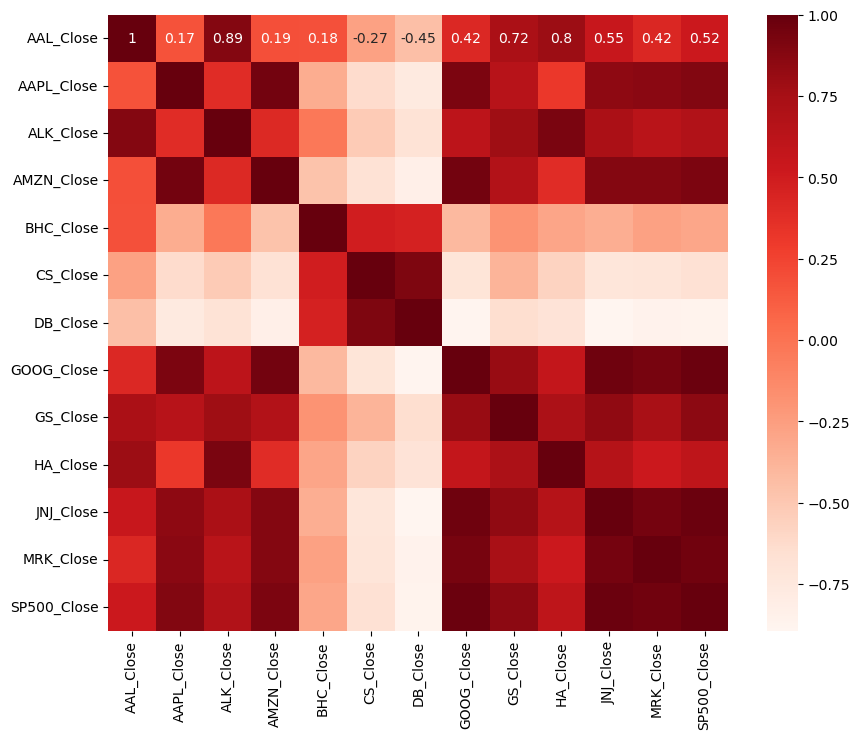

In [100]:
#Overall corelation.

plt.figure(figsize=(10, 8))
sns.heatmap(final_dataset.corr(), annot=True, cmap='Reds')
plt.show()

In [101]:
#Creating Sector wise datasets
aviation = final_dataset[['AAL_Close', 'ALK_Close','HA_Close','SP500_Close']]
finance = final_dataset[['CS_Close','DB_Close','GS_Close','SP500_Close']]
healthcare = final_dataset[['JNJ_Close','MRK_Close','SP500_Close']]
pharma = final_dataset[['BHC_Close','SP500_Close']]
technology = final_dataset[['AAPL_Close','AMZN_Close','GOOG_Close','SP500_Close']]

Text(0.5, 1.0, 'Technology Sector')

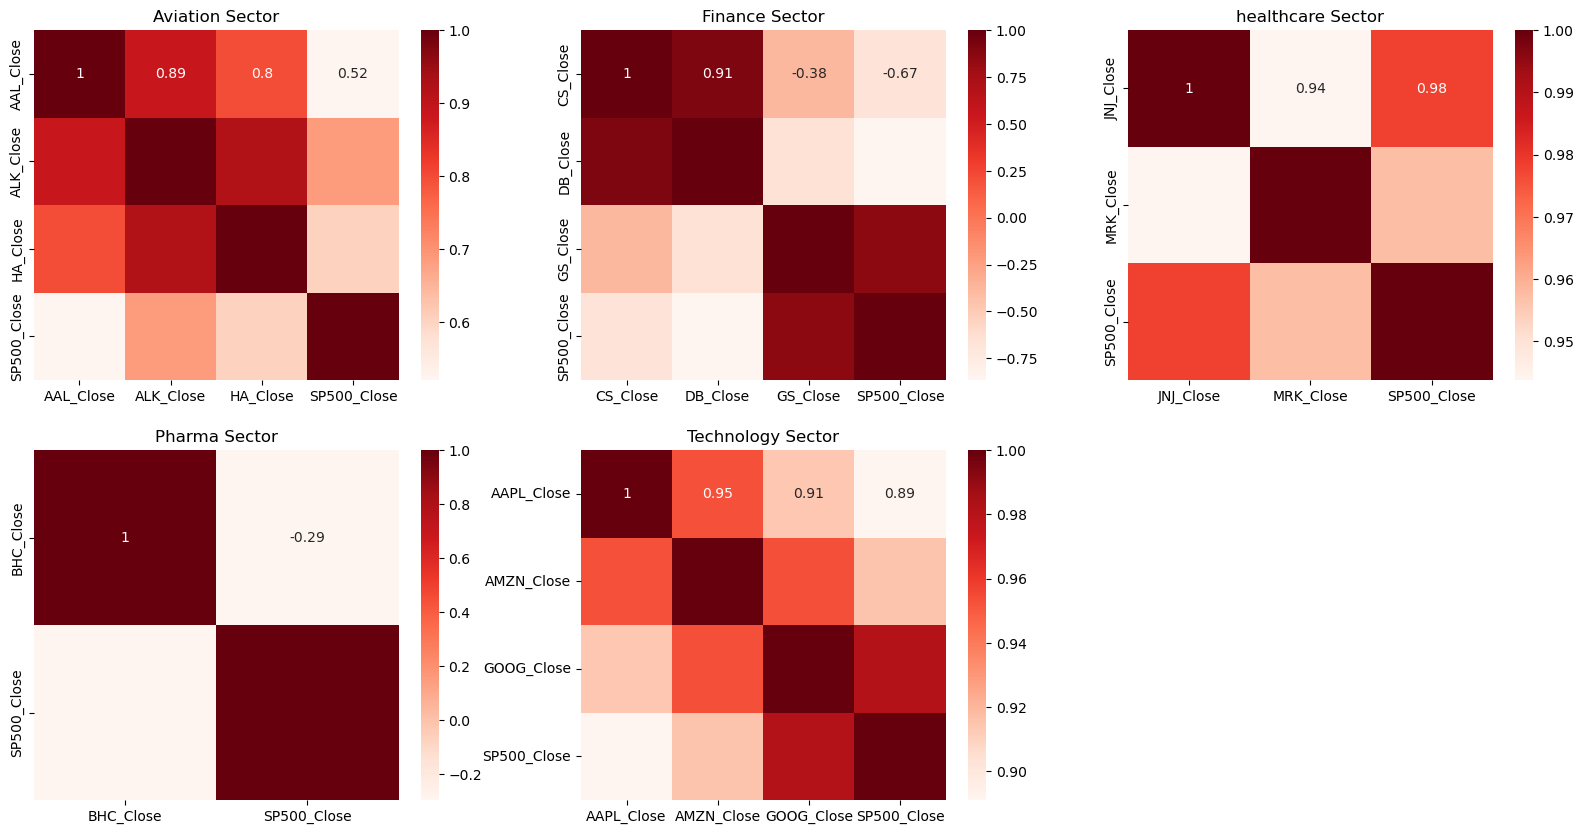

In [102]:
#Checking the correlation of stocks sector wise and finding the best stocks that have a positive corelation with Market SP500.
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.heatmap(aviation.corr(), annot=True, cmap='Reds')
plt.title("Aviation Sector")

plt.subplot(2, 3, 2)
sns.heatmap(finance.corr(), annot=True, cmap='Reds')
plt.title("Finance Sector")

plt.subplot(2, 3, 3)
sns.heatmap(healthcare.corr(), annot=True, cmap='Reds')
plt.title("healthcare Sector")

plt.subplot(2, 3, 4)
sns.heatmap(pharma.corr(), annot=True, cmap='Reds')
plt.title("Pharma Sector")
plt.subplot(2, 3, 5)
sns.heatmap(technology.corr(), annot=True, cmap='Reds')
plt.title("Technology Sector")

#Aviation Sector- NO company has very high positive corelation.
#Finance Sector- GS has very good positive corelation.
#Healthcare Sector- MRK and JNJ have very good positive corelation.
#Pharma Sector- BHC does not have good corelation.
#Technology Sector- AAPL, AMZN,GOOG all 3 have very good positive corelation.

In [103]:
#Normalising the dataset by dividing each row with the value of stock in first row. This will help in proper comaprision between stocks.
normal_dataset= final_dataset.div(final_dataset.iloc[0])
normal_dataset.head()

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  CS_Close  \
Date                                                                            
01-10-2010   1.000000    1.000000   1.000000    1.000000   1.000000  1.000000   
04-10-2010   0.981701    0.986267   0.975497    1.010930   1.004660  0.992599   
05-10-2010   0.993542    1.022724   0.981321    1.046581   1.021359  1.021970   
06-10-2010   0.993542    1.023609   0.979112    1.010995   1.036505  1.028677   
07-10-2010   0.994618    1.023715   0.933923    1.016655   1.033010  1.034228   

            DB_Close  GOOG_Close  GS_Close  HA_Close  JNJ_Close  MRK_Close  \
Date                                                                         
01-10-2010  1.000000    1.000000  1.000000  1.000000   1.000000   1.000000   
04-10-2010  0.984035    0.993779  0.992350  0.964765   0.998704   0.997814   
05-10-2010  1.025762    1.023991  1.012661  0.981543   1.017004   1.011475   
06-10-2010  1.038280    1.016609  1.021259  1.001678   1.023644   1.011202   
07-10-2010  1.027395    1.008352  1.023088  1.031879   1.023806   1.003005   

            SP500_Close  
Date                     
01-10-2010     1.000000  
04-10-2010     0.991965  
05-10-2010     1.012659  
06-10-2010     1.011978  
07-10-2010     1.010312

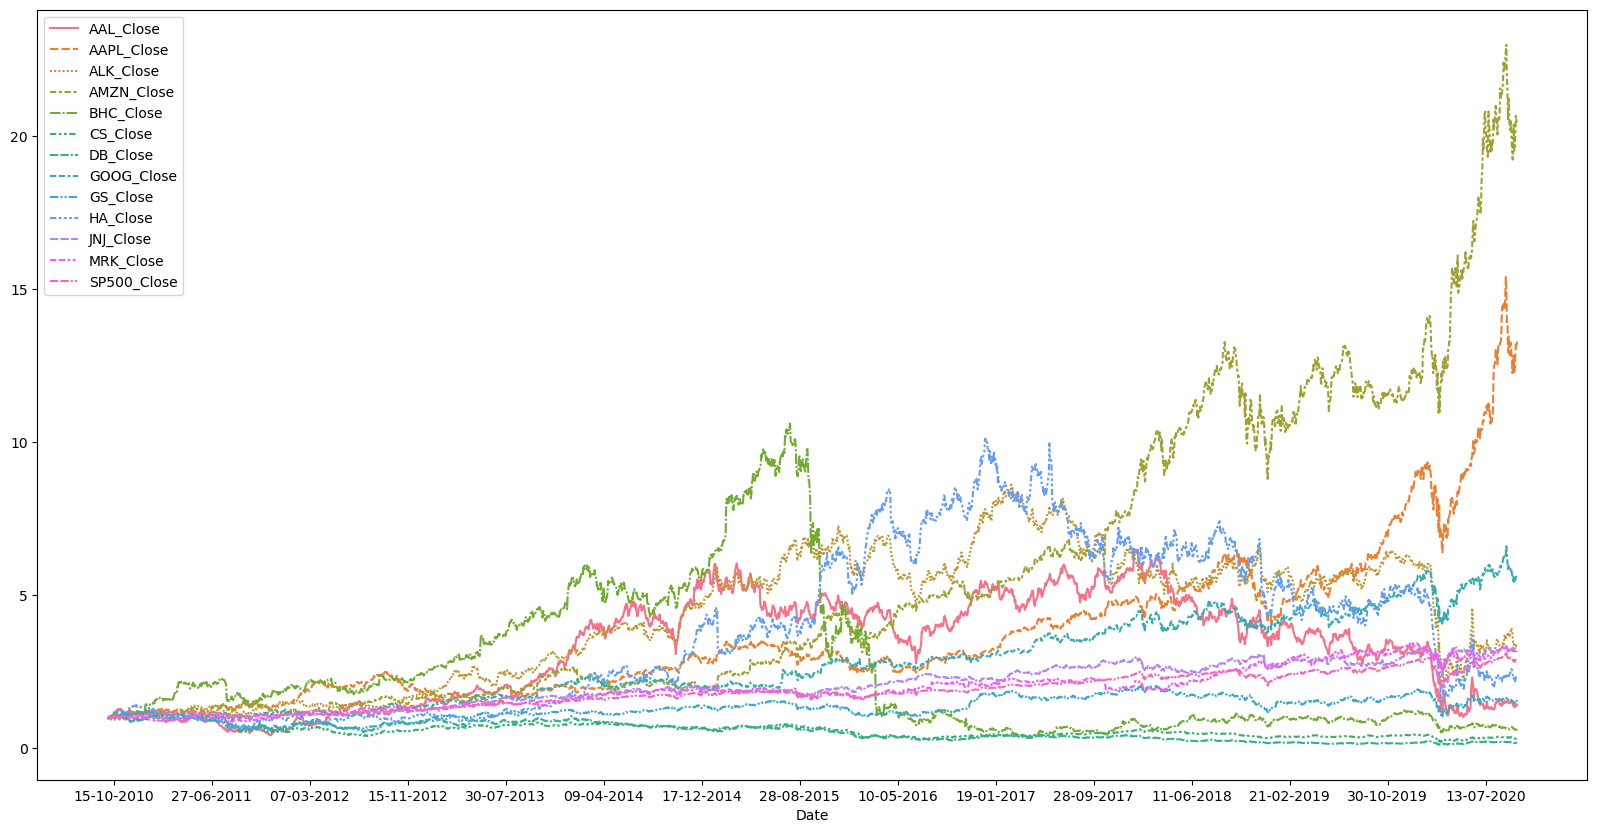

In [104]:
#Overall comparision with SP500 Market and Between Stocks
plt.figure(figsize=(20, 10))
sns.lineplot(data=normal_dataset)
plt.xticks(np.arange(10, 2600, step=175))
plt.show()

Text(0.5, 1.0, 'Technology Sector')

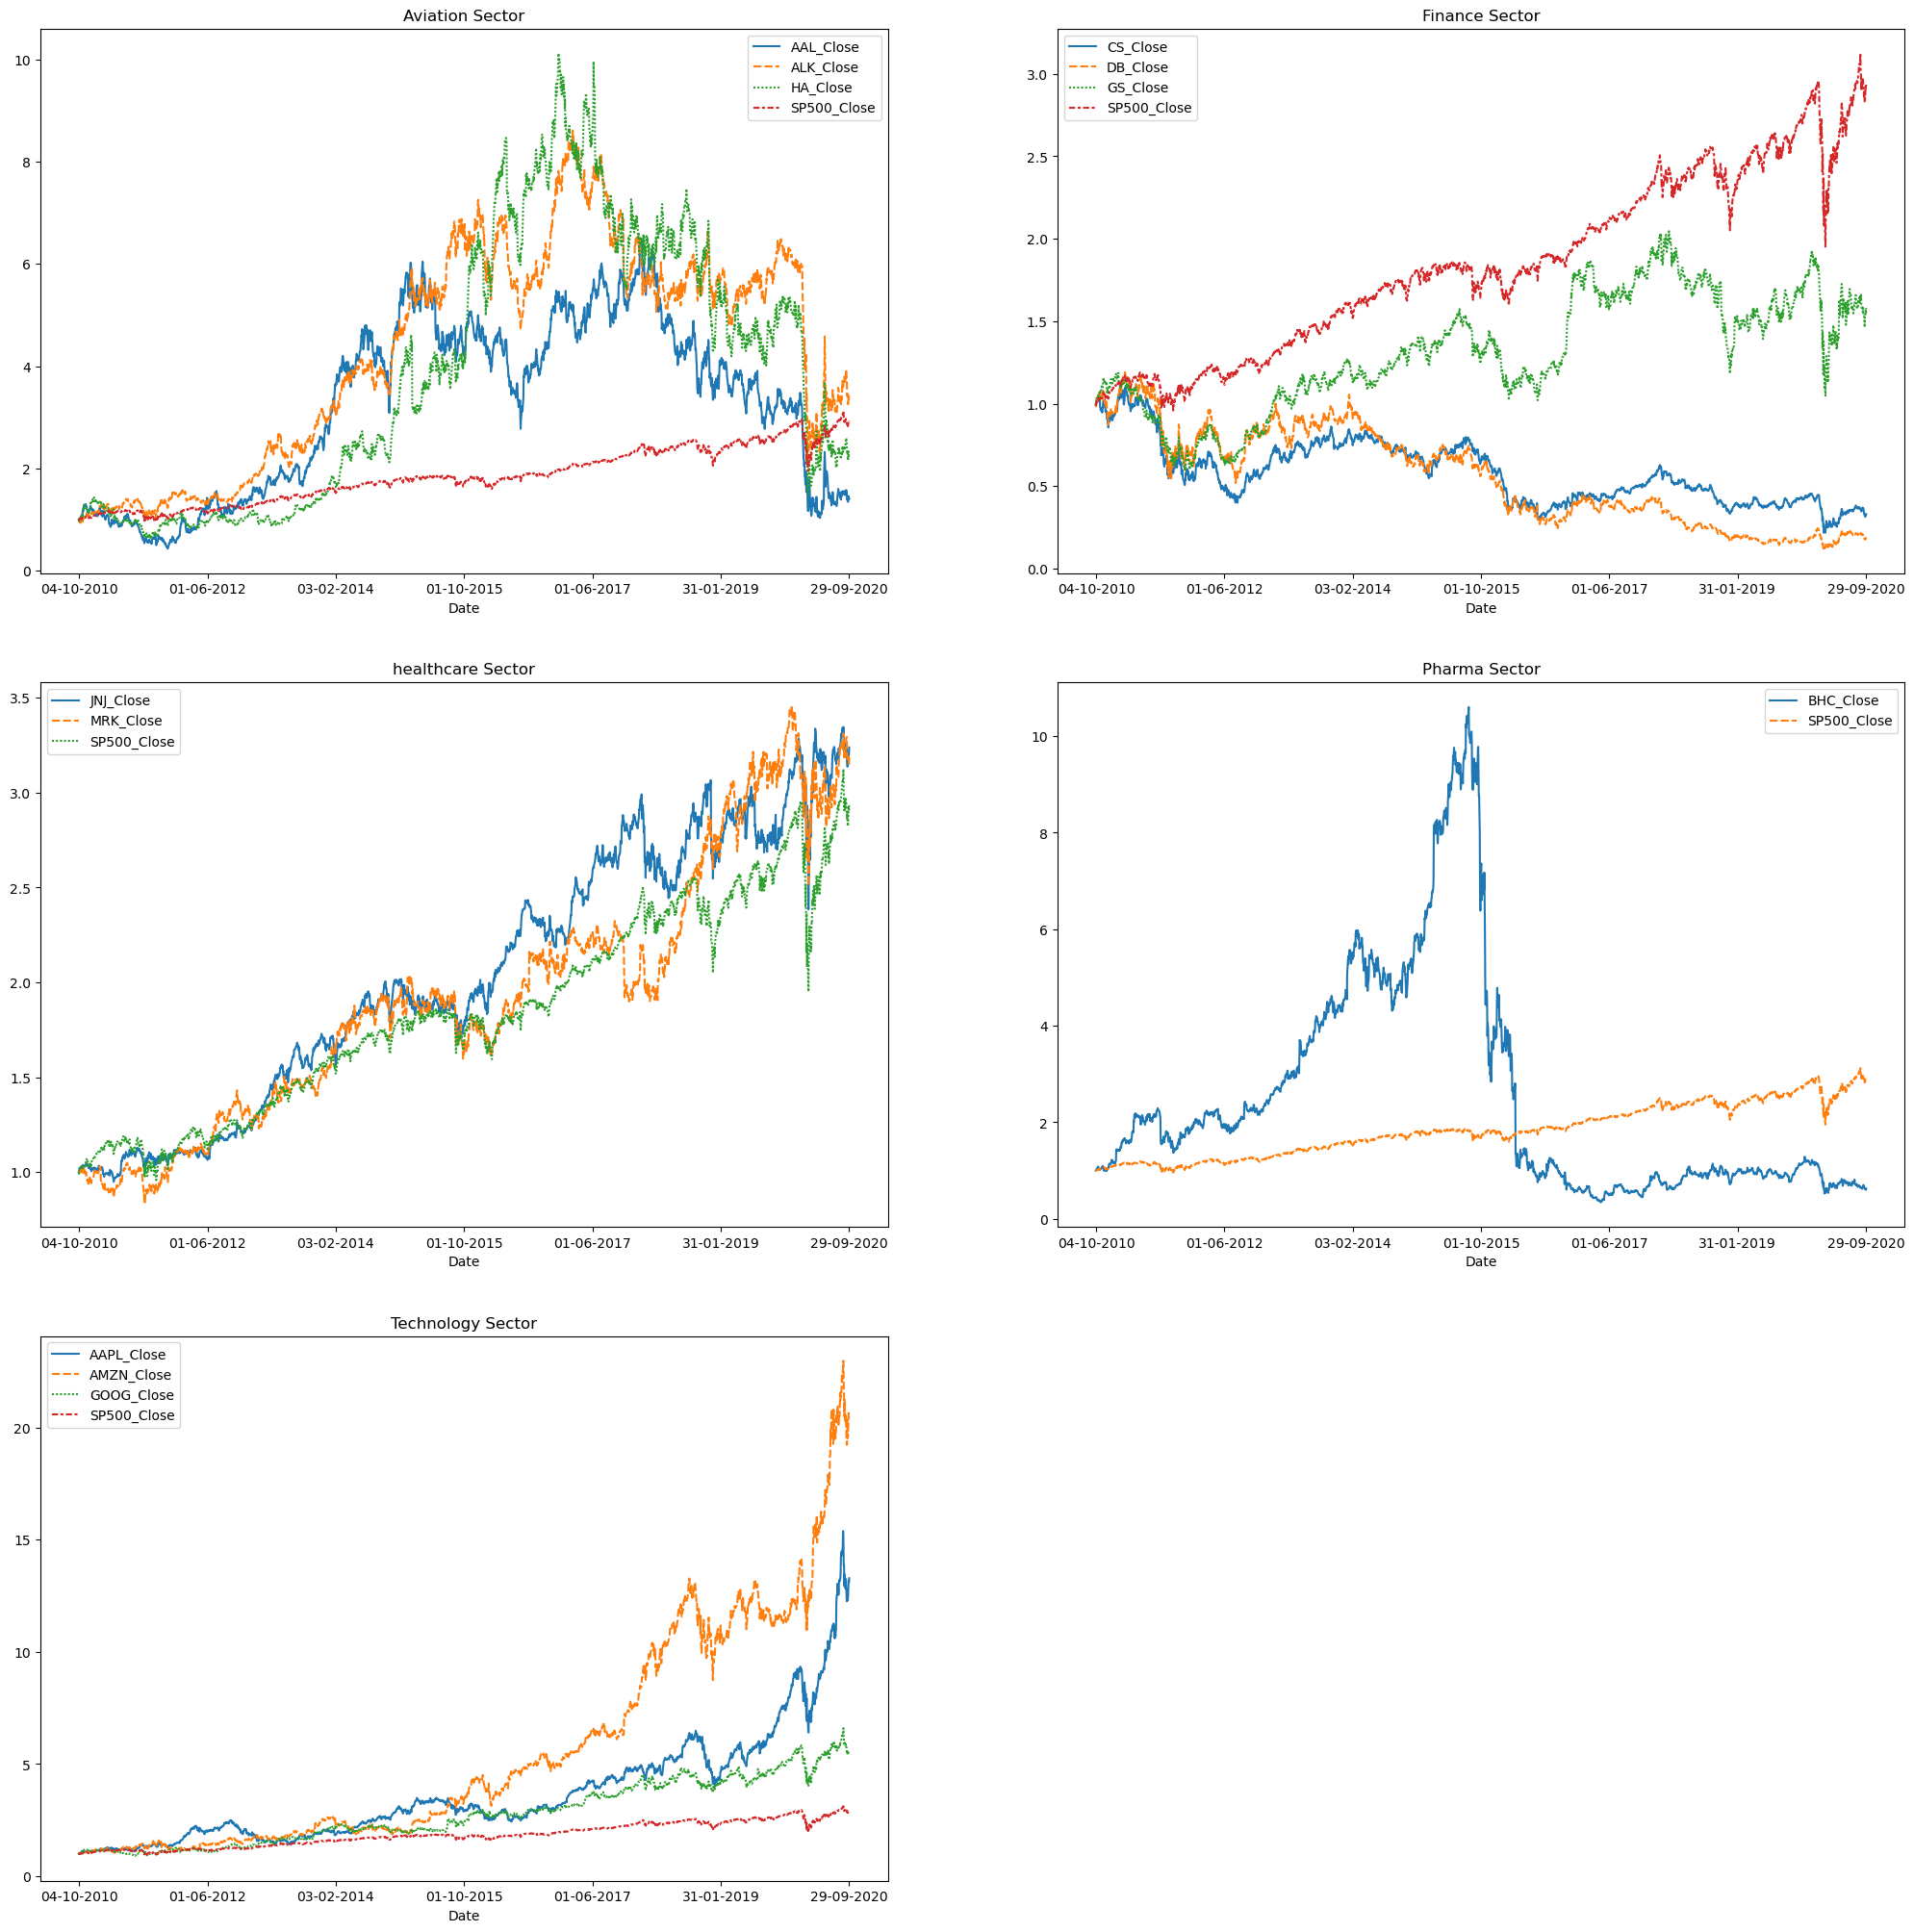

In [105]:
#Industry group or Sector Wise Comparision of Stocks
plt.figure(figsize=(25, 25))
plt.subplot(3, 2, 1)
sns.lineplot(data=normal_dataset[['AAL_Close', 'ALK_Close','HA_Close','SP500_Close']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Aviation Sector")

plt.subplot(3, 2, 2)
sns.lineplot(data=normal_dataset[['CS_Close','DB_Close','GS_Close','SP500_Close']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Finance Sector")
plt.subplot(3, 2, 3)
sns.lineplot(data=normal_dataset[['JNJ_Close','MRK_Close','SP500_Close']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("healthcare Sector")

plt.subplot(3, 2, 4)
sns.lineplot(data=normal_dataset[['BHC_Close','SP500_Close']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Pharma Sector")

plt.subplot(3, 2, 5)
sns.lineplot(data=normal_dataset[['AAPL_Close','AMZN_Close','GOOG_Close','SP500_Close']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Technology Sector")

#Aviation Sector- This sector has given good returns but has been declining from past few years. We will not select stock from it.
#Finance Sector- Only GS has given stocks comparable to market returns. Other finance stocks have declined over the period.
#Healthcare Sector- MRK and JNJ have very good returne when compard with SP500.
#Pharma Sector- BHC does not have good returns.
#Technology Sector- AAPL, AMZN,GOOG all 3 stocks have out performed the market returns by huge margin.

Capital Asset Pricing Model (CAPM)

In [106]:
# Dropping the rows with missing values
return_stocks = return_stocks.dropna(axis=0)
return_stocks.head()

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  CS_Close  \
Date                                                                            
04-10-2010  -0.018299   -0.013733  -0.024503    0.010930   0.004660 -0.007401   
05-10-2010   0.012061    0.036965   0.005971    0.035266   0.016622  0.029590   
06-10-2010   0.000000    0.000865  -0.002251   -0.034003   0.014829  0.006562   
07-10-2010   0.001083    0.000104  -0.046154    0.005599  -0.003372  0.005396   
08-10-2010  -0.018398    0.016769   0.036344   -0.004607   0.009023 -0.015653   

            DB_Close  GOOG_Close  GS_Close  HA_Close  JNJ_Close  MRK_Close  \
Date                                                                         
04-10-2010 -0.015965   -0.006221 -0.007650 -0.035235  -0.001296  -0.002186   
05-10-2010  0.042404    0.030401  0.020468  0.017391   0.018324   0.013691   
06-10-2010  0.012204   -0.007209  0.008490  0.020513   0.006529  -0.000270   
07-10-2010 -0.010484   -0.008122  0.001791  0.030151   0.000158  -0.008106   
08-10-2010 -0.003002    0.011962  0.010257  0.000000   0.000158   0.005448   

            SP500_Close  
Date                     
04-10-2010    -0.008035  
05-10-2010     0.020861  
06-10-2010    -0.000672  
07-10-2010    -0.001647  
08-10-2010     0.006122

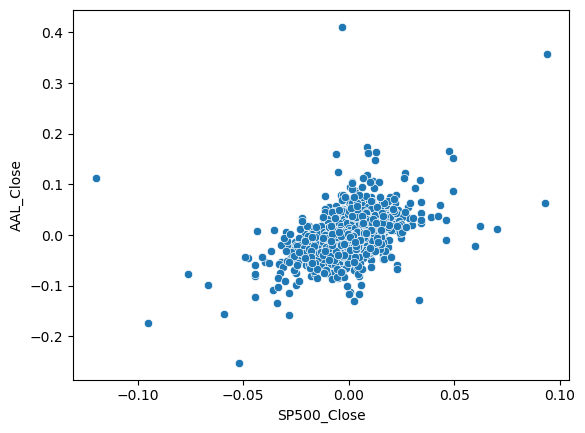

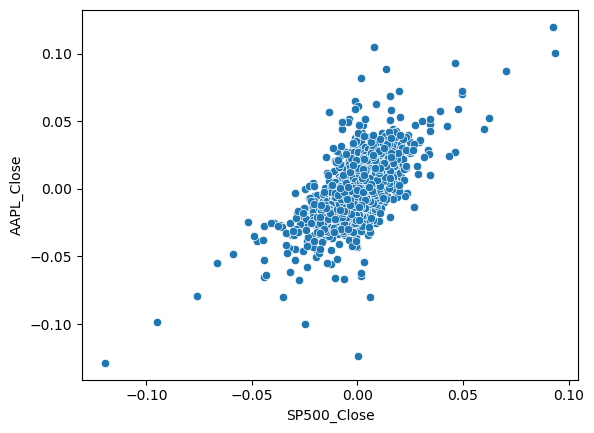

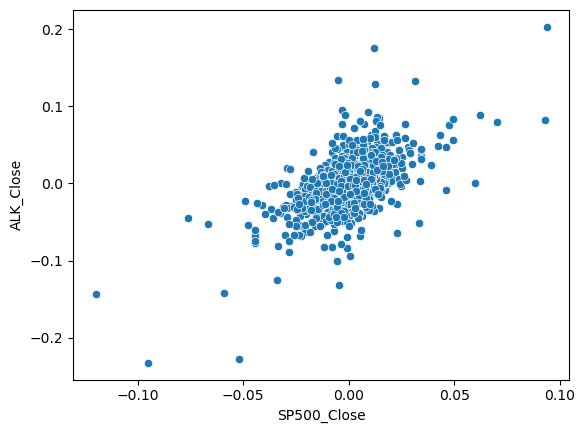

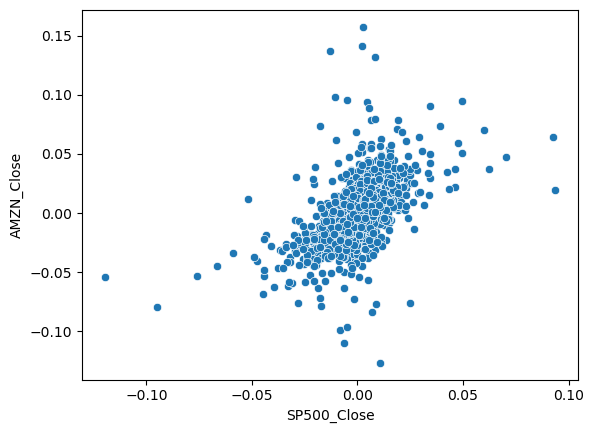

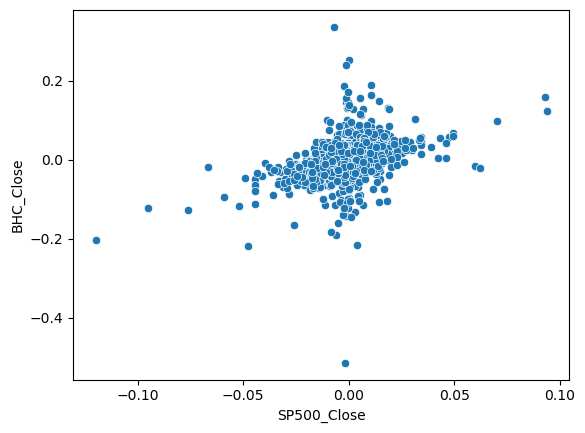

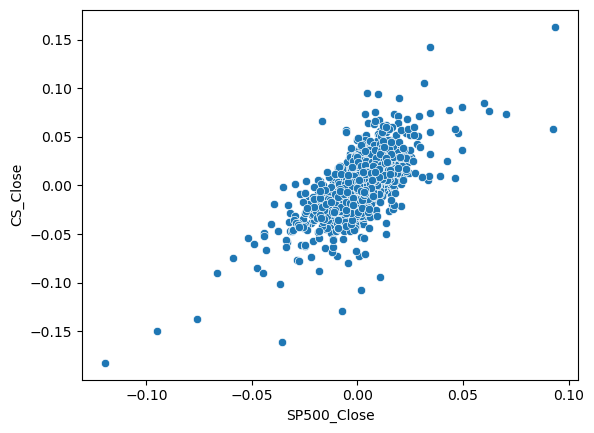

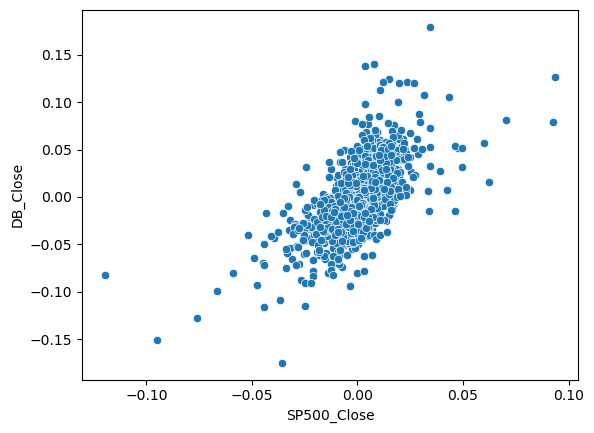

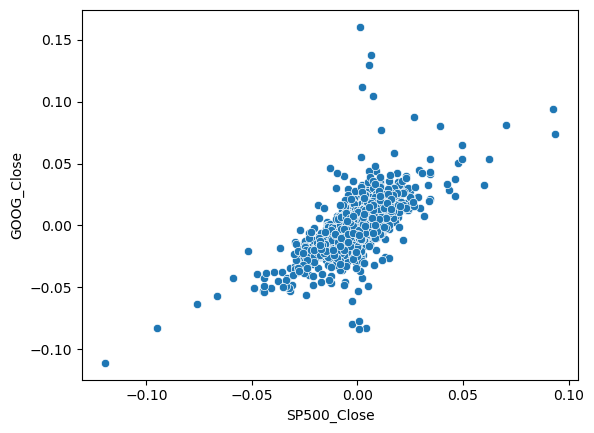

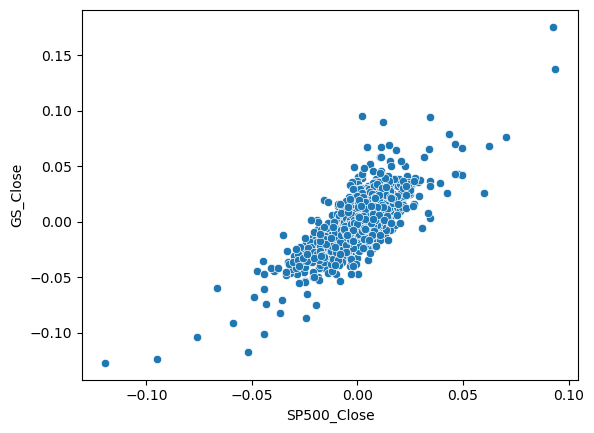

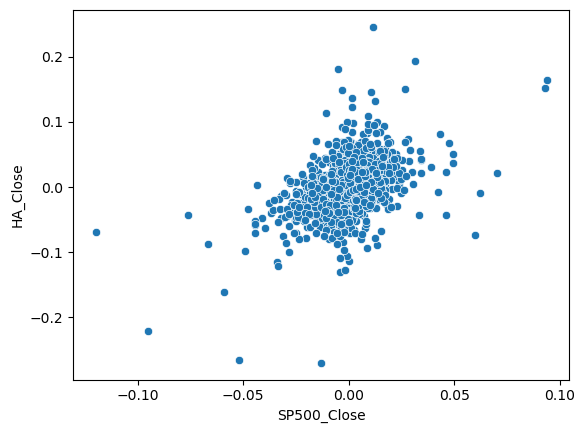

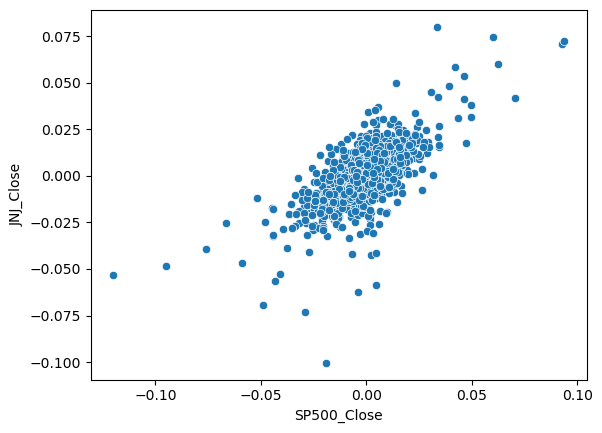

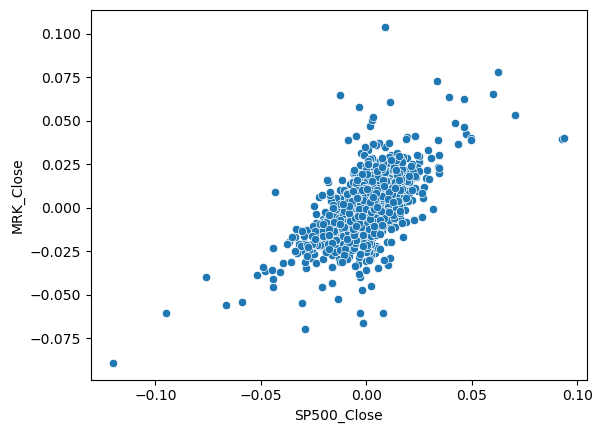

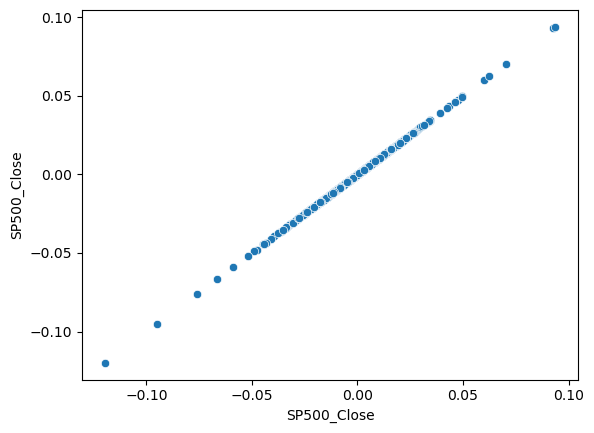

In [107]:
#Checking distribution of stock returns with SP500, we can see some linear trends.
list2= return_stocks.columns
for i in list2:
    sns.scatterplot(data= return_stocks, x= 'SP500_Close' , y= i)
    plt.show()

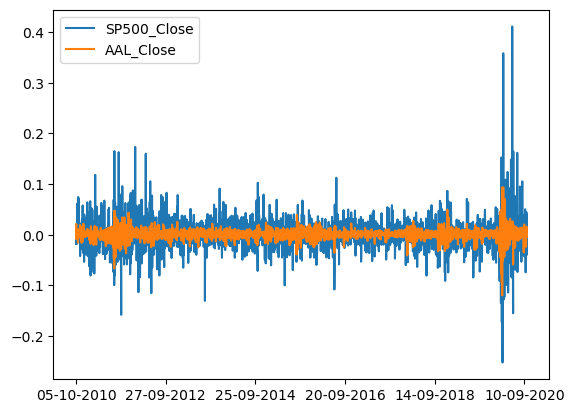

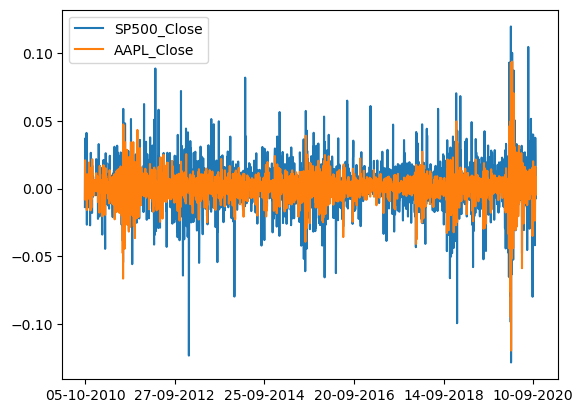

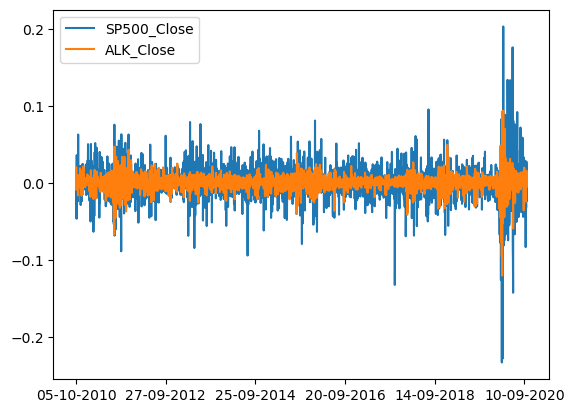

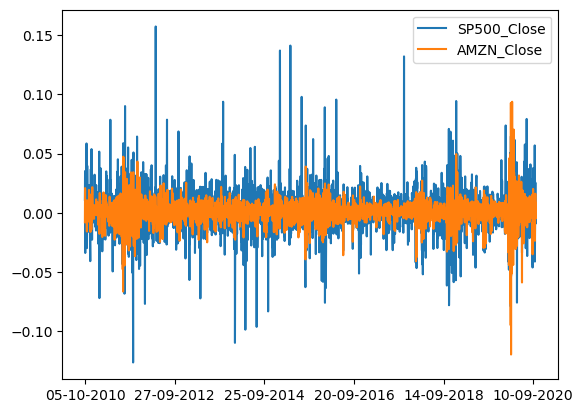

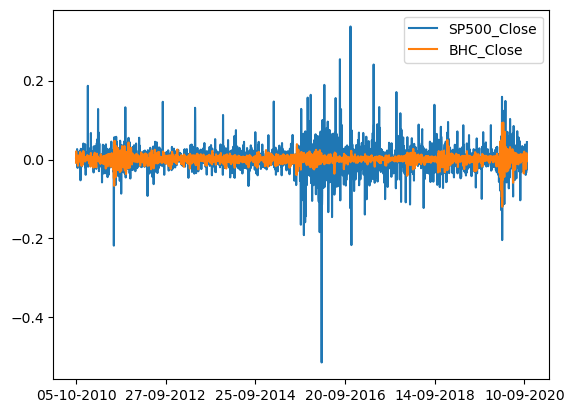

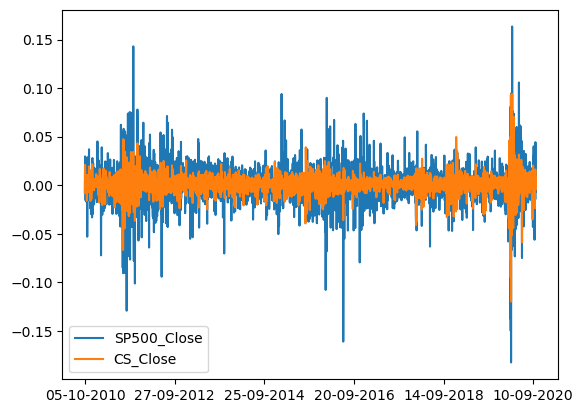

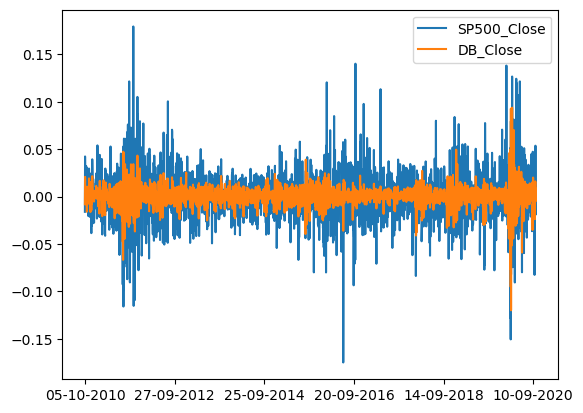

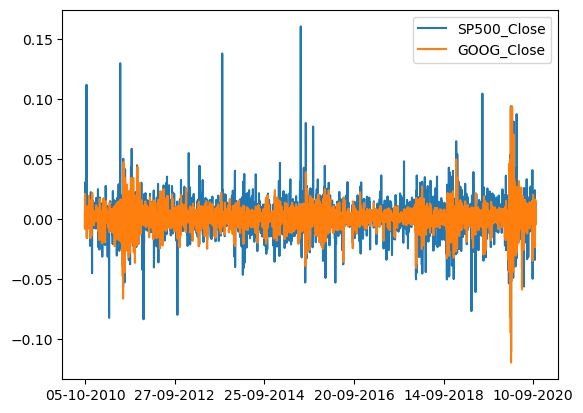

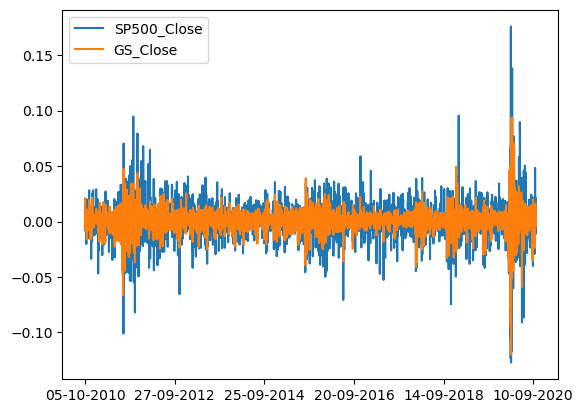

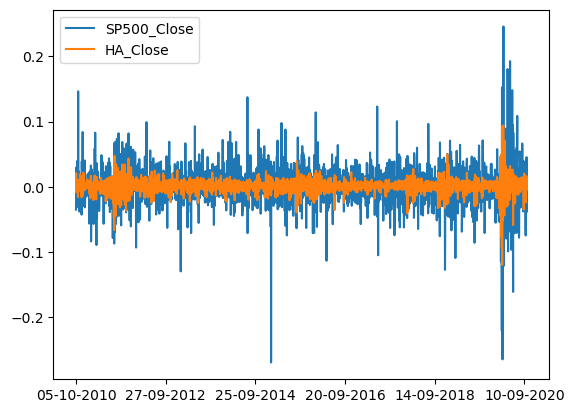

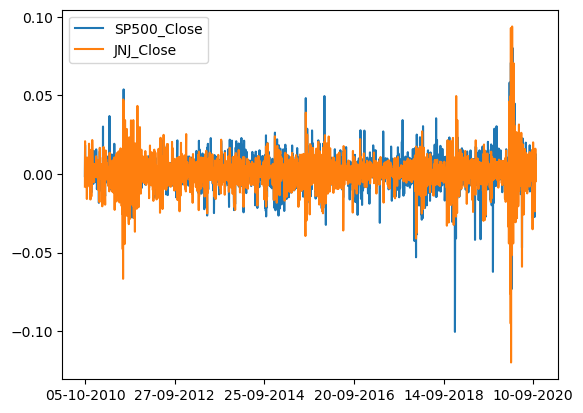

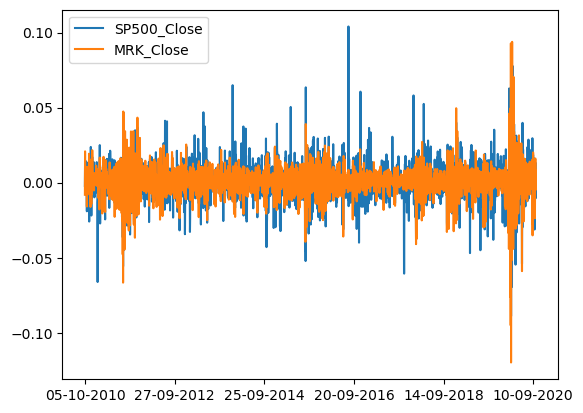

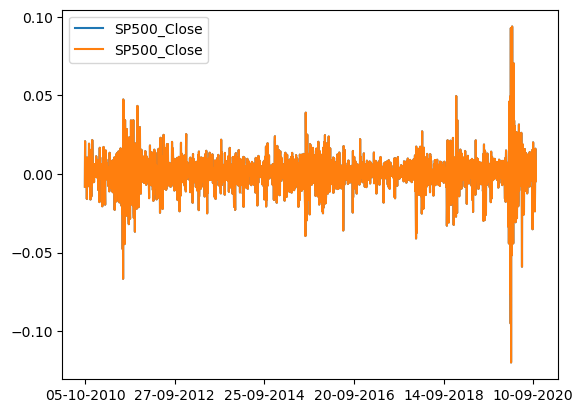

In [108]:
list2= return_stocks.columns
for i in list2:
    plt.plot(return_stocks[[i,'SP500_Close']])
    plt.legend(['SP500_Close',i])
    plt.xticks(np.arange(1, 2518, step=500))
    plt.show()
    
#From daily return distribution compared to SP500 Market return we can select following stocks:
# AAPL, AMZN, ALK, GOOG, GS, JNJ, MRK

In [109]:
# Evaluating beta for all stocks using linear regression.
risk_free_return = 0.75
market_return = ((return_stocks['SP500_Close'].mean())*252)*100
model = LinearRegression()
x_train = return_stocks['SP500_Close'].values.reshape(-1,1)
for i in list1:
    y_train = return_stocks[i].values.reshape(-1,1)
    model.fit(x_train, y_train)
    print("                       ")
    print("******************######################******************")
    print("                       ",i)
    print("******************######################******************")
    print("Alpha: %.5f%%"%(model.intercept_*100))
    print("Beta: %.5f"%model.coef_)
    beta = model.coef_
    expected_return = risk_free_return + beta*(market_return-risk_free_return)
    print("risk_free_return : ",risk_free_return)
    print("Market_return : ",market_return)
    print("Expected Return: ", expected_return)
    #print("%: ",((df["m_returns"].mean()*12))/expected_return)
    #from the comparision between Beta and Expected Returns of each stock.
#Since Alexa is conservative and wants stable returns, so target would be to select stocks that have Beta close to 1 and have given consistent returns when compared to SP500 market returns.
#  We can select below stocks.
# AAPL, AMZN, GOOG, JNJ, MRK - These stocks are from 2 sectors Tech and Healthcare. To diversify further we will choose.
# GS from finance sector as this stock has given returns of 15.7 when compared to market return of 12 %.
# ALK from aviation sector as Beta is only 1.2 and also has always given better returns than SP 500 and is best among the selected stocks from aviation industry.

                       
******************######################******************
                        AAL_Close
******************######################******************
Alpha: -0.00002%
Beta: 1.35331
risk_free_return :  0.75
Market_return :  12.296594451619882
Expected Return:  [[16.3761707]]
                       
******************######################******************
                        AAPL_Close
******************######################******************
Alpha: 0.06667%
Beta: 1.06311
risk_free_return :  0.75
Market_return :  12.296594451619882
Expected Return:  [[13.02531116]]
                       
******************######################******************
                        ALK_Close
******************######################******************
Alpha: 0.01586%
Beta: 1.23197
risk_free_return :  0.75
Market_return :  12.296594451619882
Expected Return:  [[14.97502541]]
                       
******************######################******************
             

Final Portifolio will have following stocks:

In [ ]:
#Ticker	Industry	       Company Name

#GS     Finance	           Goldman Sachs
#JNJ	Healthcare	       Johnson & Johnson
#MRK	Healthcare	       Merck and CO inc.
#AAPL	Technology	       Apple Inc
#AMZN	Technology	       Amazon
#GOOG	Technology	       Alphabet

In [111]:
portfolio = final_dataset[['GS_Close','JNJ_Close','MRK_Close','AAPL_Close','AMZN_Close','GOOG_Close']]
portfolio_sp500_normal = normal_dataset[['GS_Close','JNJ_Close','MRK_Close','AAPL_Close','AMZN_Close','GOOG_Close','SP500_Close']]

In [112]:
portfolio.head()

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
Date                                                                   
01-10-2010  127.147858  45.970119  26.052284    8.719163  153.710007   
04-10-2010  126.175117  45.910553  25.995331    8.599421  155.389999   
05-10-2010  128.757706  46.751797  26.351234    8.917298  160.869995   
06-10-2010  129.850906  47.057022  26.344130    8.925013  155.399994   
07-10-2010  130.083435  47.064480  26.130579    8.925941  156.270004   

            GOOG_Close  
Date                    
01-10-2010  261.828613  
04-10-2010  260.199707  
05-10-2010  268.110046  
06-10-2010  266.177307  
07-10-2010  264.015411

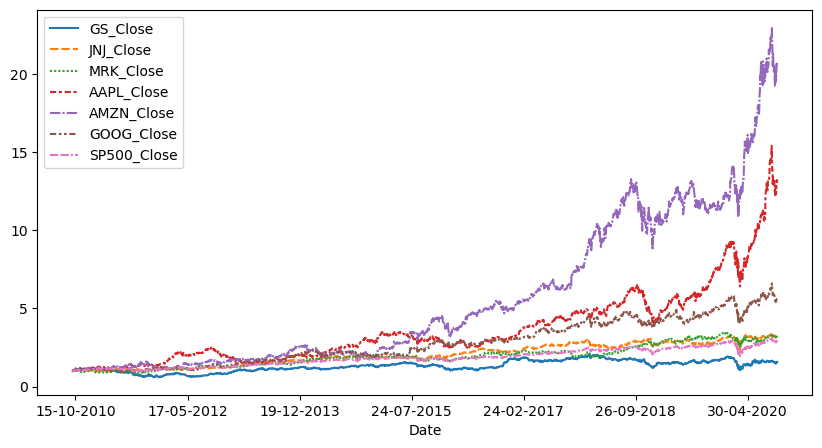

In [113]:
#Portfolio comparision with SP500 Market and Between Stocks
plt.figure(figsize=(10, 5))
sns.lineplot(data=portfolio_sp500_normal)
plt.xticks(np.arange(10, 2600, step=400))
plt.show()

In [114]:
# Initial weight for each stock in order
stocks = ['GS_Close','JNJ_Close','MRK_Close','AAPL_Close','AMZN_Close','GOOG_Close']
initial_weight = np.array([0.14, 0.14, 0.14,0.14,0.14,0.16])  # Assuming equal distrubution

In [115]:
# Daily return from each stock 
return_stocks = portfolio.pct_change()
return_stocks.head(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  GOOG_Close
Date                                                                          
01-10-2010       NaN        NaN        NaN         NaN         NaN         NaN
04-10-2010 -0.007650  -0.001296  -0.002186   -0.013733    0.010930   -0.006221
05-10-2010  0.020468   0.018324   0.013691    0.036965    0.035266    0.030401
06-10-2010  0.008490   0.006529  -0.000270    0.000865   -0.034003   -0.007209
07-10-2010  0.001791   0.000158  -0.008106    0.000104    0.005599   -0.008122

Average daily return from each stock

In [116]:
# Average daily return from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

GS_Close      0.000350
JNJ_Close     0.000526
MRK_Close     0.000545
AAPL_Close    0.001185
AMZN_Close    0.001398
GOOG_Close    0.000818
dtype: float64


Total Portfolio Return

In [118]:
# Total Portfolio Return - Store the reults in "portfolio_return"
# Total Portfolio Return = Weighted average of return from each stock
allocated_daily_returns = (initial_weight * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0006913321882608597


Total Portfolio Return per year

In [120]:
print(round((portfolio_return*252)*100,2), "%")

17.42 %


Daily return from the portfolio

In [121]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
Date                                                                 
24-09-2020  0.048302   0.001592   0.006293    0.010269    0.006644   
25-09-2020 -0.000820   0.006843  -0.002646    0.037516    0.024949   
28-09-2020  0.021134   0.009955  -0.002050    0.023869    0.025498   
29-09-2020 -0.011453  -0.000340  -0.010391   -0.007568   -0.009190   
30-09-2020  0.021241   0.012376   0.012820    0.015076    0.001224   

            GOOG_Close  Portfolio_Daily_Return  
Date                                            
24-09-2020    0.009242                0.011713  
25-09-2020    0.011671                0.011085  
28-09-2020    0.013537                0.013143  
29-09-2020    0.003284               -0.004927  
30-09-2020    0.000184                0.008813

<Axes: xlabel='Date'>

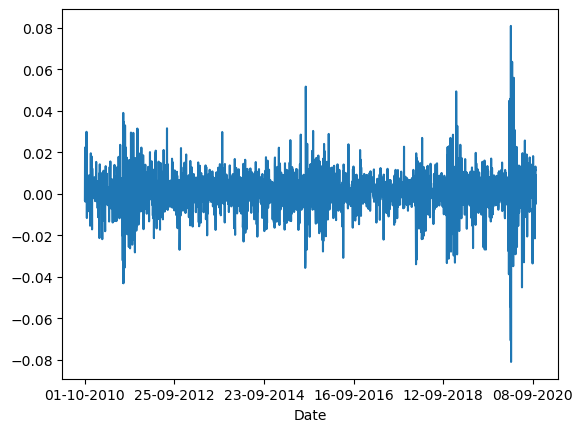

In [122]:
# Plot
return_stocks['Portfolio_Daily_Return'].plot()

Cumulative return from the Portfolio

In [123]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
Date                                                                 
24-09-2020  1.534513   3.147044   3.191659   12.411742   19.646021   
25-09-2020  1.533254   3.168580   3.183214   12.877383   20.136164   
28-09-2020  1.565658   3.200122   3.176689   13.184752   20.649599   
29-09-2020  1.547726   3.199035   3.143678   13.084971   20.459825   
30-09-2020  1.580601   3.238626   3.183982   13.282238   20.484873   

            GOOG_Close  Portfolio_Daily_Return  
Date                                            
24-09-2020    5.455057                4.877892  
25-09-2020    5.518724                4.931965  
28-09-2020    5.593430                4.996784  
29-09-2020    5.611801                4.972167  
30-09-2020    5.612832                5.015985

<Axes: xlabel='Date'>

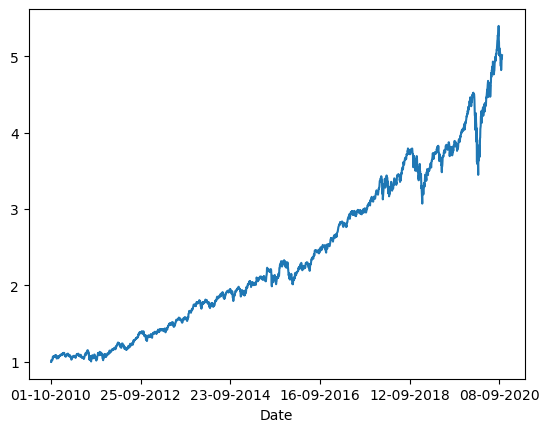

In [124]:
# Plot
Cumulative_returns_daily['Portfolio_Daily_Return'].plot()

In [125]:
Cumulative_returns_daily['Portfolio_Daily_Return'].mean()

2.394407121097422

In [127]:
#Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = return_stocks.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  GOOG_Close
GS_Close    0.084631   0.022697   0.026114    0.037234    0.032825    0.036625
JNJ_Close   0.022697   0.029451   0.020684    0.018062    0.017578    0.018379
MRK_Close   0.026114   0.020684   0.042657    0.019264    0.017781    0.019621
AAPL_Close  0.037234   0.018062   0.019264    0.078997    0.038520    0.038174
AMZN_Close  0.032825   0.017578   0.017781    0.038520    0.099689    0.046959
GOOG_Close  0.036625   0.018379   0.019621    0.038174    0.046959    0.066854

In [128]:
# Applying the matrix operations mentioned in the image above
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [129]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.15897409760970466

Sharpe Ratio of Portfolio

In [130]:
Sharpe_Ratio = return_stocks['Portfolio_Daily_Return'].mean()/ return_stocks['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.06903362513670264

In [131]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio

print("ANNUALISED SHARPE RATIO FOR COMPLETE PORTFOLIO IS:")
print(round(Annualised_Sharpe_Ratio,2))

ANNUALISED SHARPE RATIO FOR COMPLETE PORTFOLIO IS:
1.1


Sharpe Ratio of Individual Stocks from Portfolio

In [132]:
#Sharpe_Ratio_ALK = (return_stocks['ALK_Close'].mean()/ return_stocks['ALK_Close'].std())*(252**0.5)
Sharpe_Ratio_GS = (return_stocks['GS_Close'].mean()/ return_stocks['GS_Close'].std())*(252**0.5)
Sharpe_Ratio_JNJ = (return_stocks['JNJ_Close'].mean()/ return_stocks['JNJ_Close'].std())*(252**0.5)
Sharpe_Ratio_MRK = (return_stocks['MRK_Close'].mean()/ return_stocks['MRK_Close'].std())*(252**0.5)
Sharpe_Ratio_AAPL = (return_stocks['AAPL_Close'].mean()/ return_stocks['AAPL_Close'].std())*(252**0.5)
Sharpe_Ratio_AMZN= (return_stocks['AMZN_Close'].mean()/ return_stocks['AMZN_Close'].std())*(252**0.5)
Sharpe_Ratio_GOOG= (return_stocks['GOOG_Close'].mean()/ return_stocks['GOOG_Close'].std())*(252**0.5)
print("ANNUALISED SHARPE RATIOS FOR INDIVIDUAL STOCKS ARE:")
#print("Sharpe_Ratio_ALK- ", round(Sharpe_Ratio_ALK,2))
print("Sharpe_Ratio_GS- ",round(Sharpe_Ratio_GS,2))
print("Sharpe_Ratio_JNJ- ",round(Sharpe_Ratio_JNJ,2))
print("Sharpe_Ratio_MRK- ", round(Sharpe_Ratio_MRK,2))
print("Sharpe_Ratio_AAPL- ", round(Sharpe_Ratio_AAPL,2))
print("Sharpe_Ratio_AMZN- ", round(Sharpe_Ratio_AMZN,2))
print("Sharpe_Ratio_GOOG- ",round(Sharpe_Ratio_GOOG,2))

ANNUALISED SHARPE RATIOS FOR INDIVIDUAL STOCKS ARE:
Sharpe_Ratio_GS-  0.3
Sharpe_Ratio_JNJ-  0.77
Sharpe_Ratio_MRK-  0.66
Sharpe_Ratio_AAPL-  1.06
Sharpe_Ratio_AMZN-  1.12
Sharpe_Ratio_GOOG-  0.8


Stock Price Prediction

In [133]:
portfolio.head()

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
Date                                                                   
01-10-2010  127.147858  45.970119  26.052284    8.719163  153.710007   
04-10-2010  126.175117  45.910553  25.995331    8.599421  155.389999   
05-10-2010  128.757706  46.751797  26.351234    8.917298  160.869995   
06-10-2010  129.850906  47.057022  26.344130    8.925013  155.399994   
07-10-2010  130.083435  47.064480  26.130579    8.925941  156.270004   

            GOOG_Close  
Date                    
01-10-2010  261.828613  
04-10-2010  260.199707  
05-10-2010  268.110046  
06-10-2010  266.177307  
07-10-2010  264.015411

In [134]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 01-10-2010 to 30-09-2020
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GS_Close    2517 non-null   float64
 1   JNJ_Close   2517 non-null   float64
 2   MRK_Close   2517 non-null   float64
 3   AAPL_Close  2517 non-null   float64
 4   AMZN_Close  2517 non-null   float64
 5   GOOG_Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 202.2+ KB


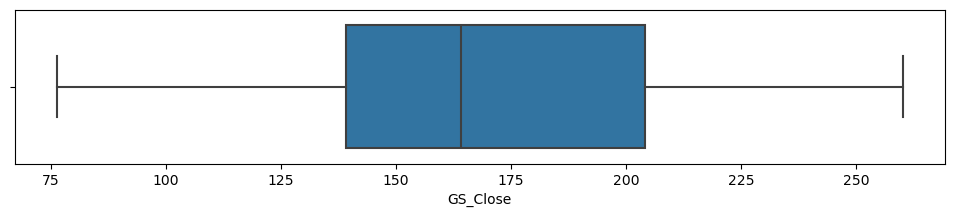

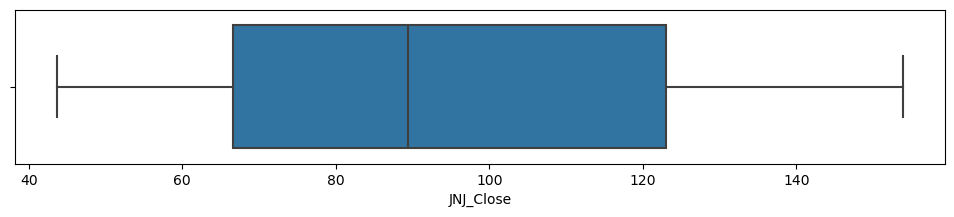

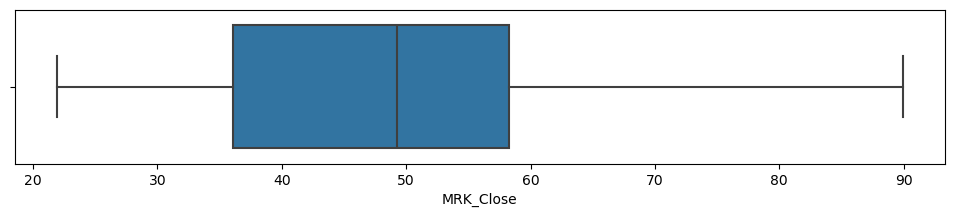

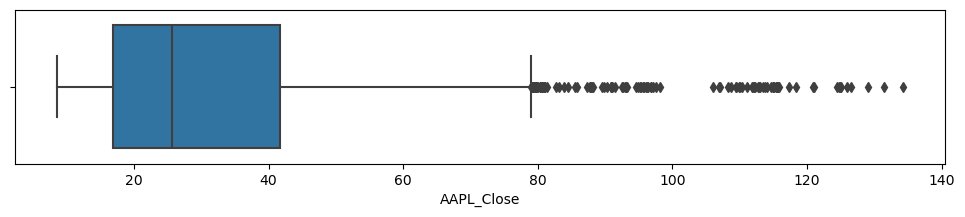

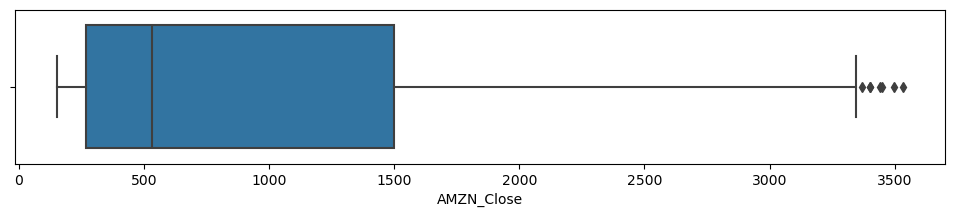

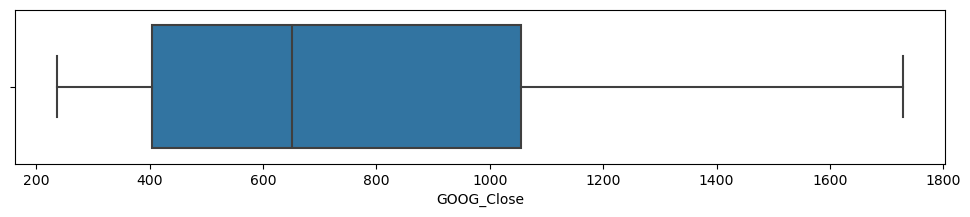

In [135]:
# Check for outliers
for col in portfolio.columns:
    fig = plt.subplots(figsize=(12, 2))
    ax = sns.boxplot(x=portfolio[col],whis=1.5)

In [136]:
# Replacing the outliers with the median value
for col in portfolio.columns:
    Q1 = portfolio[col].quantile(0.25)
    Q3 = portfolio[col].quantile(0.75)
    IQR = Q3 - Q1
    
    col_median = portfolio[col].median()
    
    # IQR
    portfolio[col] = np.where(portfolio[col] < (Q1 - 1.5 * IQR), col_median, portfolio[col])
    portfolio[col] = np.where(portfolio[col] > (Q3 + 1.5 * IQR), col_median, portfolio[col])

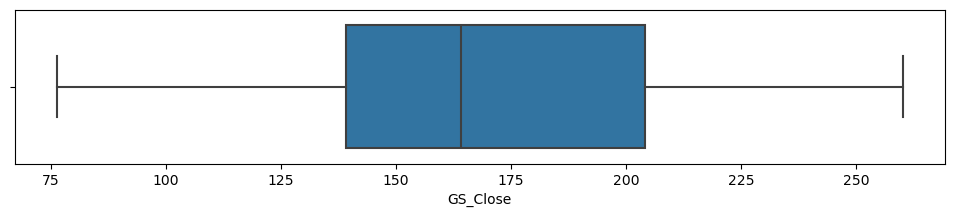

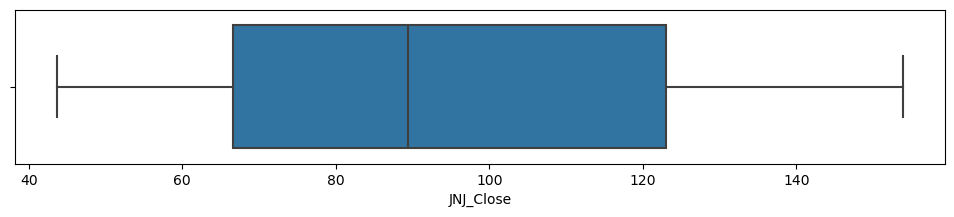

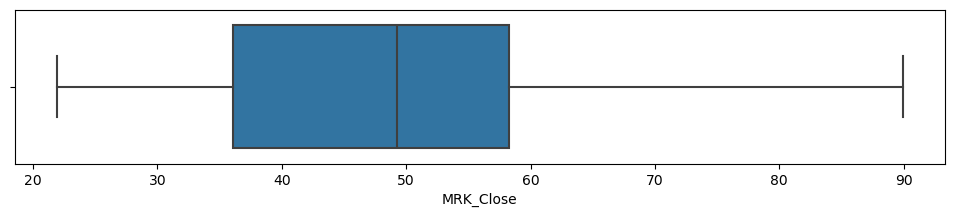

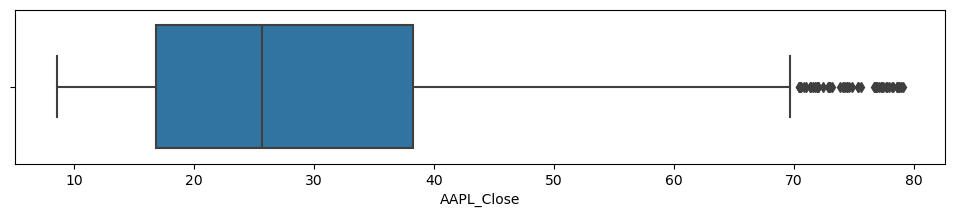

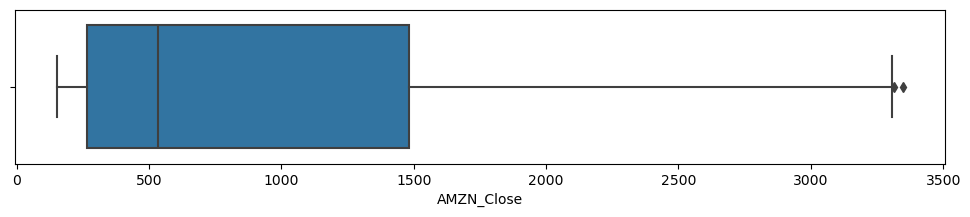

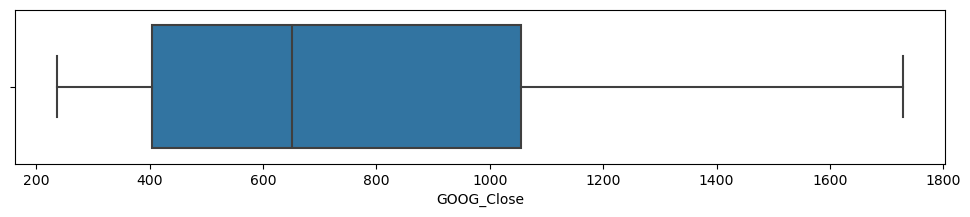

In [137]:
# Check for outliers
for col in portfolio.columns:
    fig = plt.subplots(figsize=(12, 2))
    ax = sns.boxplot(x=portfolio[col],whis=1.5)

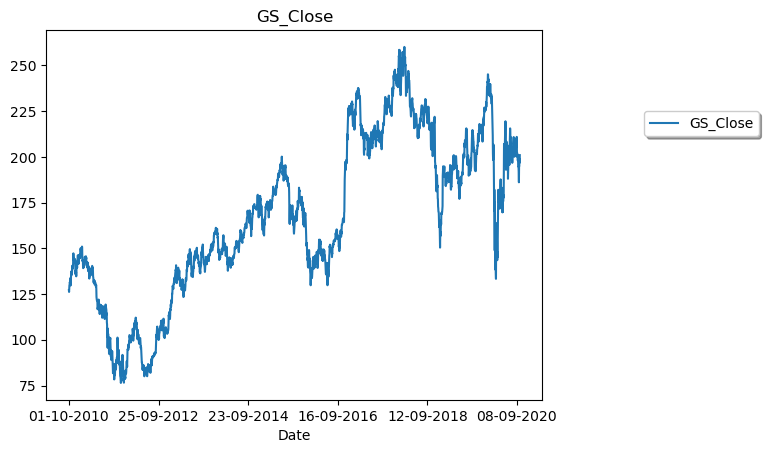

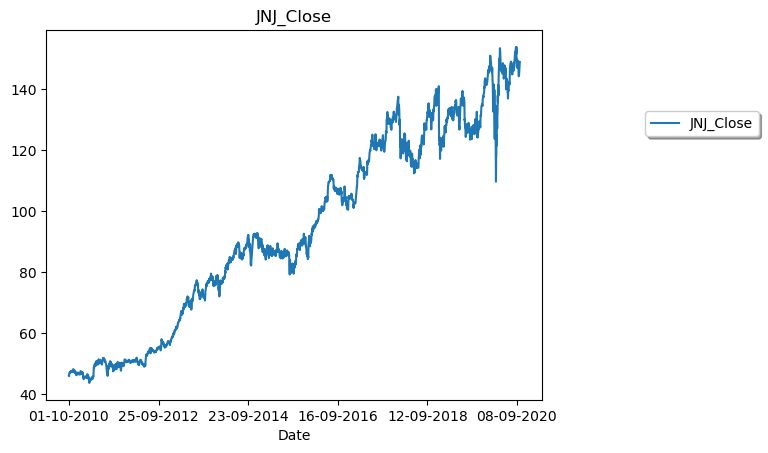

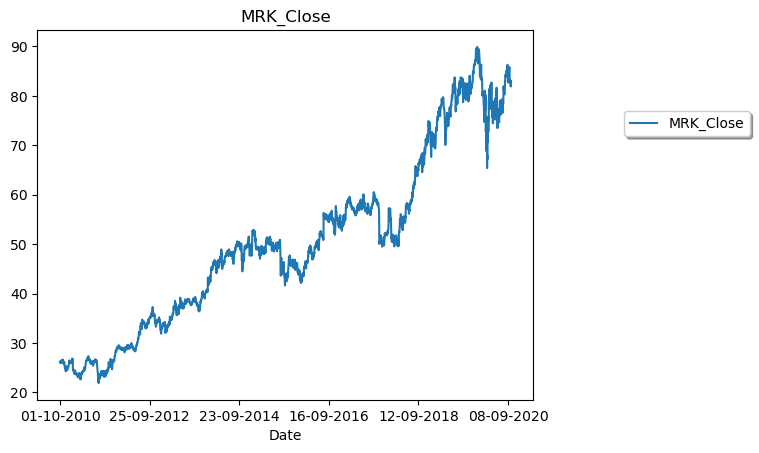

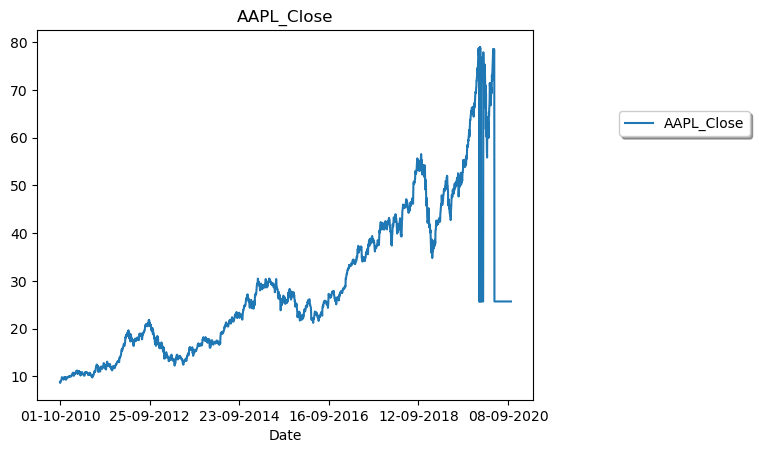

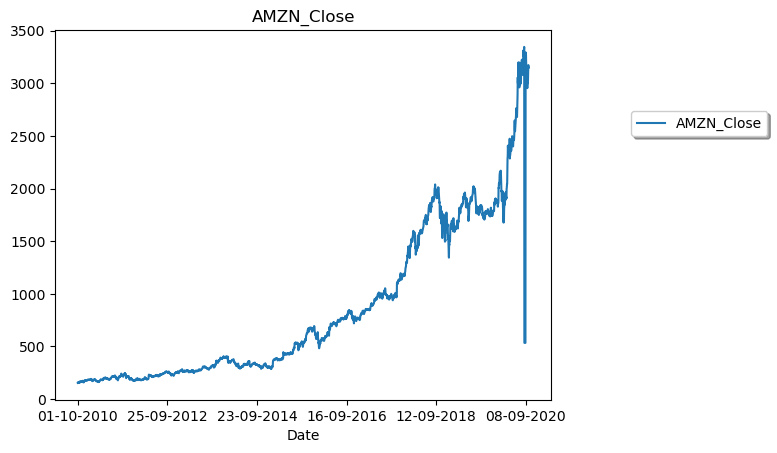

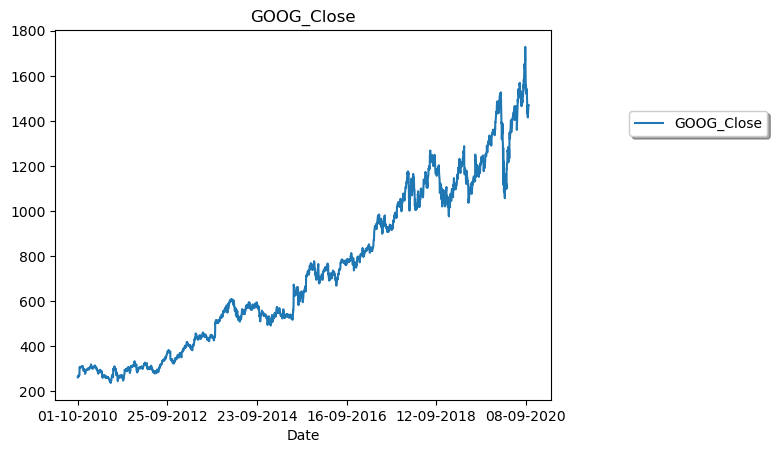

In [138]:
# Visualize the new series

for i in portfolio.columns:
    portfolio[i].plot(kind = 'line', legend = 'reverse', title = 'Portfolio')
    plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.45, 0.8))
    plt.title(i)
    plt.show()

In [139]:
#Normalising the dataset by dividing each row with the value of stock in first row. This will help in proper comaprision between stocks.
portfolio_sp500= final_dataset.div(final_dataset.iloc[0])
normal_dataset.head()

AAL_Close  AAPL_Close  ALK_Close  AMZN_Close  BHC_Close  CS_Close  \
Date                                                                            
01-10-2010   1.000000    1.000000   1.000000    1.000000   1.000000  1.000000   
04-10-2010   0.981701    0.986267   0.975497    1.010930   1.004660  0.992599   
05-10-2010   0.993542    1.022724   0.981321    1.046581   1.021359  1.021970   
06-10-2010   0.993542    1.023609   0.979112    1.010995   1.036505  1.028677   
07-10-2010   0.994618    1.023715   0.933923    1.016655   1.033010  1.034228   

            DB_Close  GOOG_Close  GS_Close  HA_Close  JNJ_Close  MRK_Close  \
Date                                                                         
01-10-2010  1.000000    1.000000  1.000000  1.000000   1.000000   1.000000   
04-10-2010  0.984035    0.993779  0.992350  0.964765   0.998704   0.997814   
05-10-2010  1.025762    1.023991  1.012661  0.981543   1.017004   1.011475   
06-10-2010  1.038280    1.016609  1.021259  1.001678   1.023644   1.011202   
07-10-2010  1.027395    1.008352  1.023088  1.031879   1.023806   1.003005   

            SP500_Close  
Date                     
01-10-2010     1.000000  
04-10-2010     0.991965  
05-10-2010     1.012659  
06-10-2010     1.011978  
07-10-2010     1.010312

Time series Decomposition

Additive seasonal decomposition

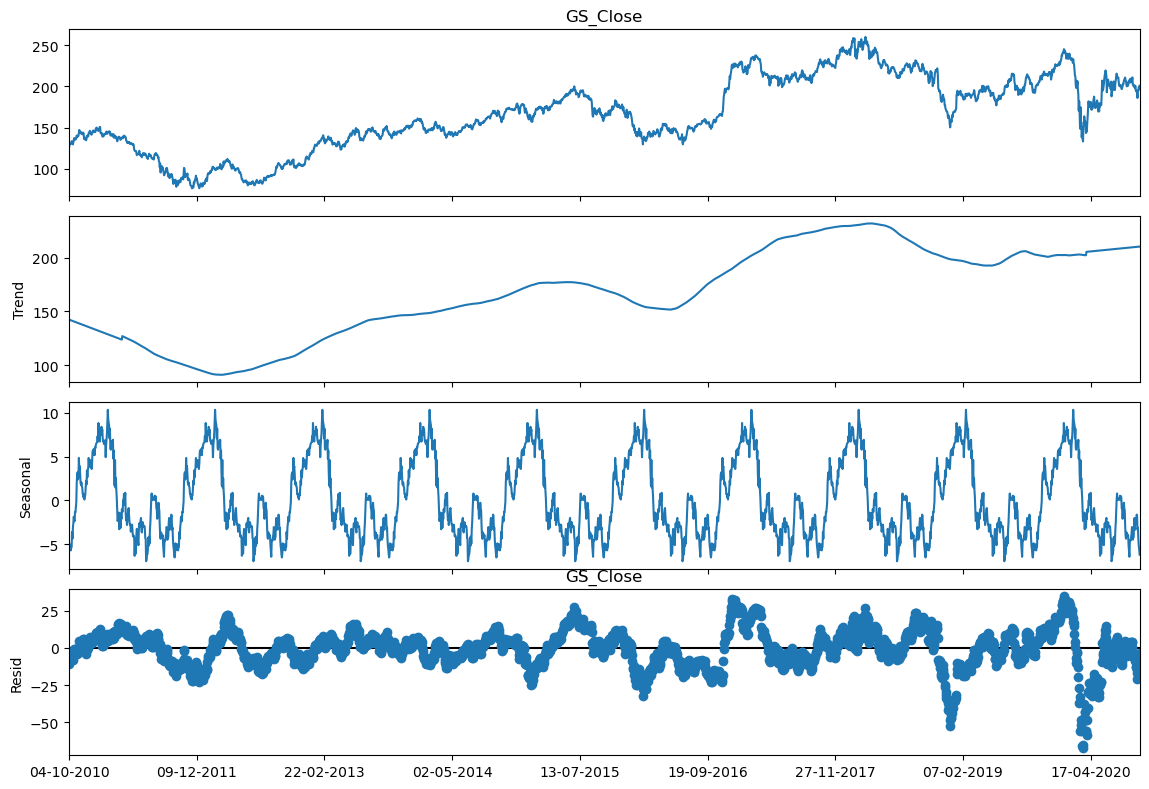

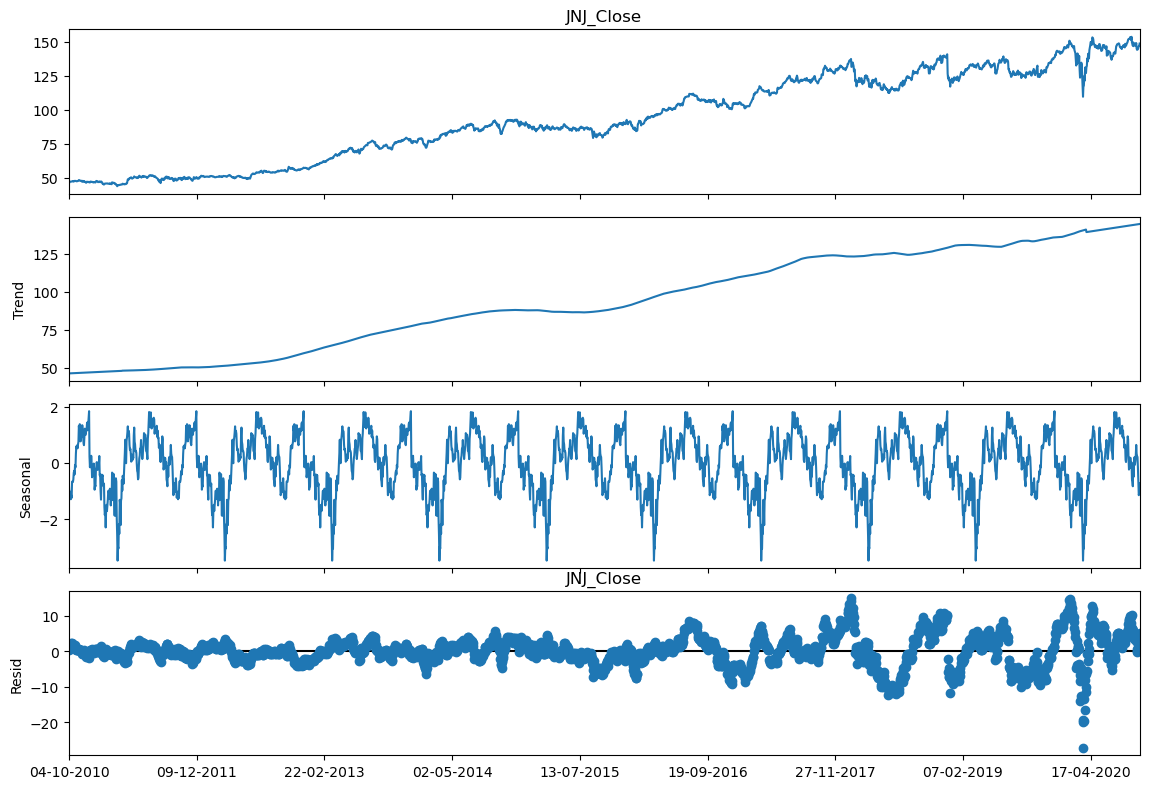

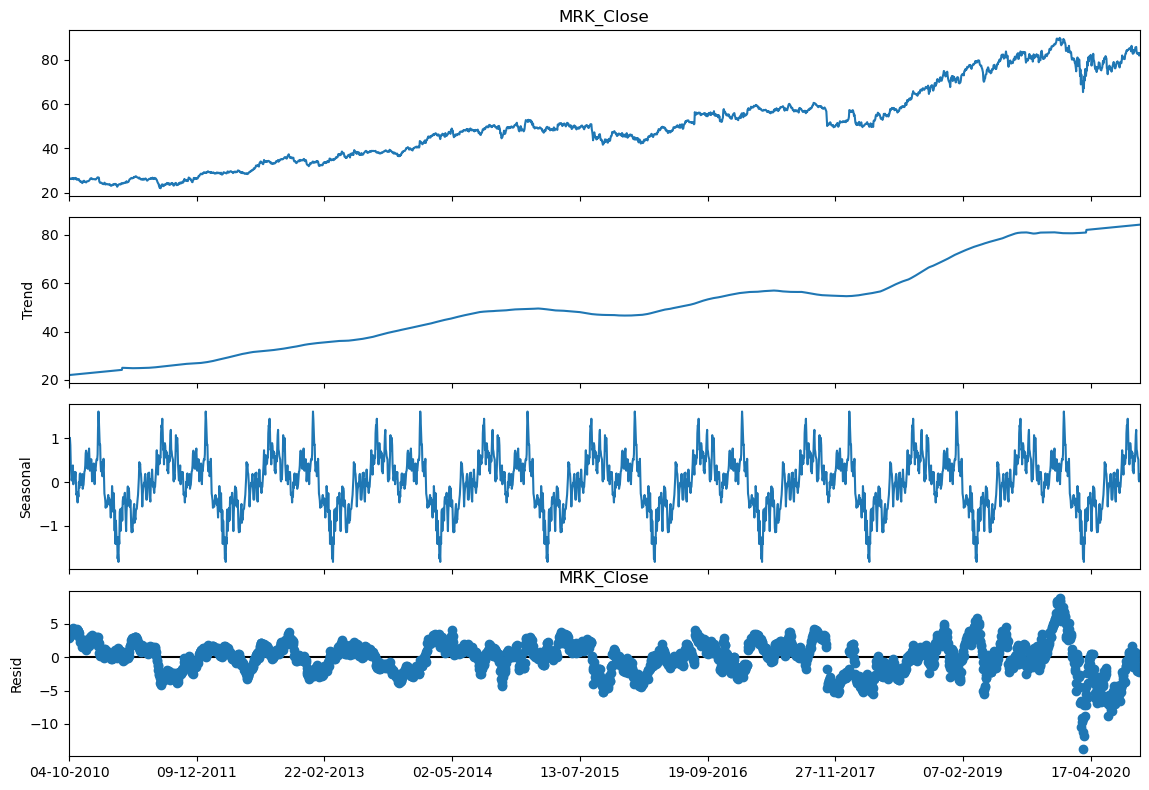

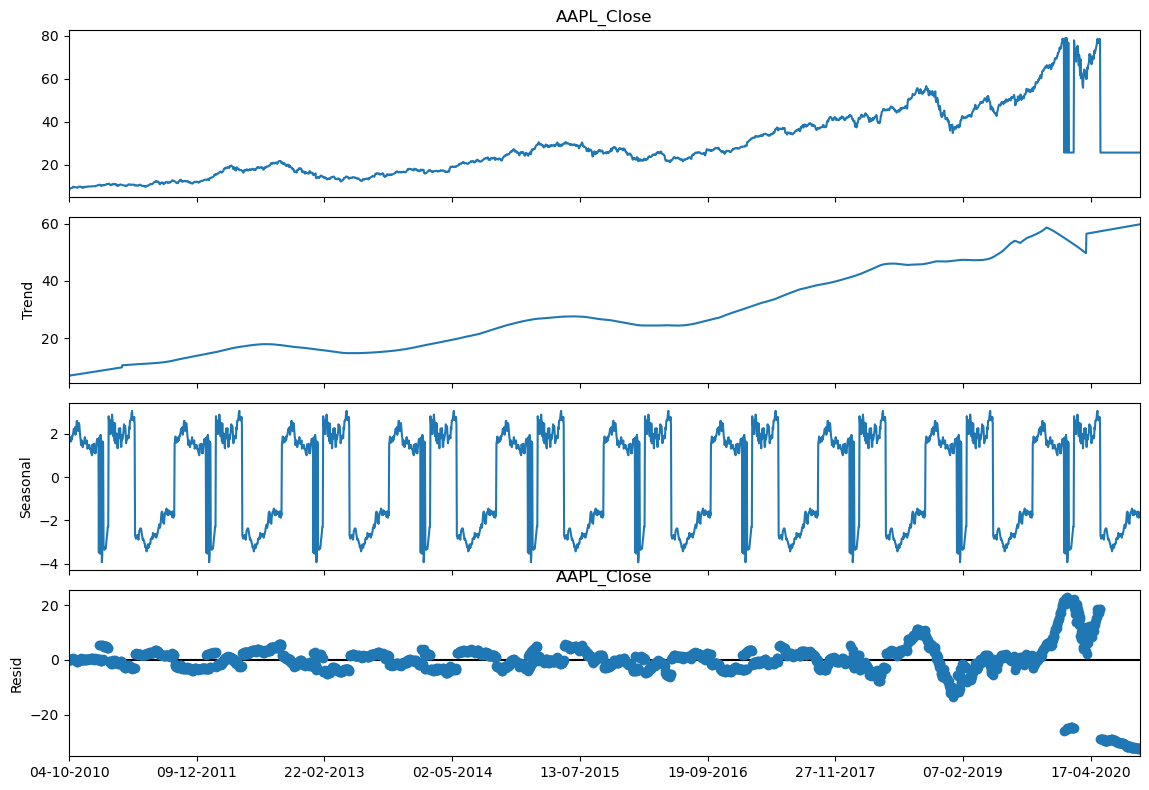

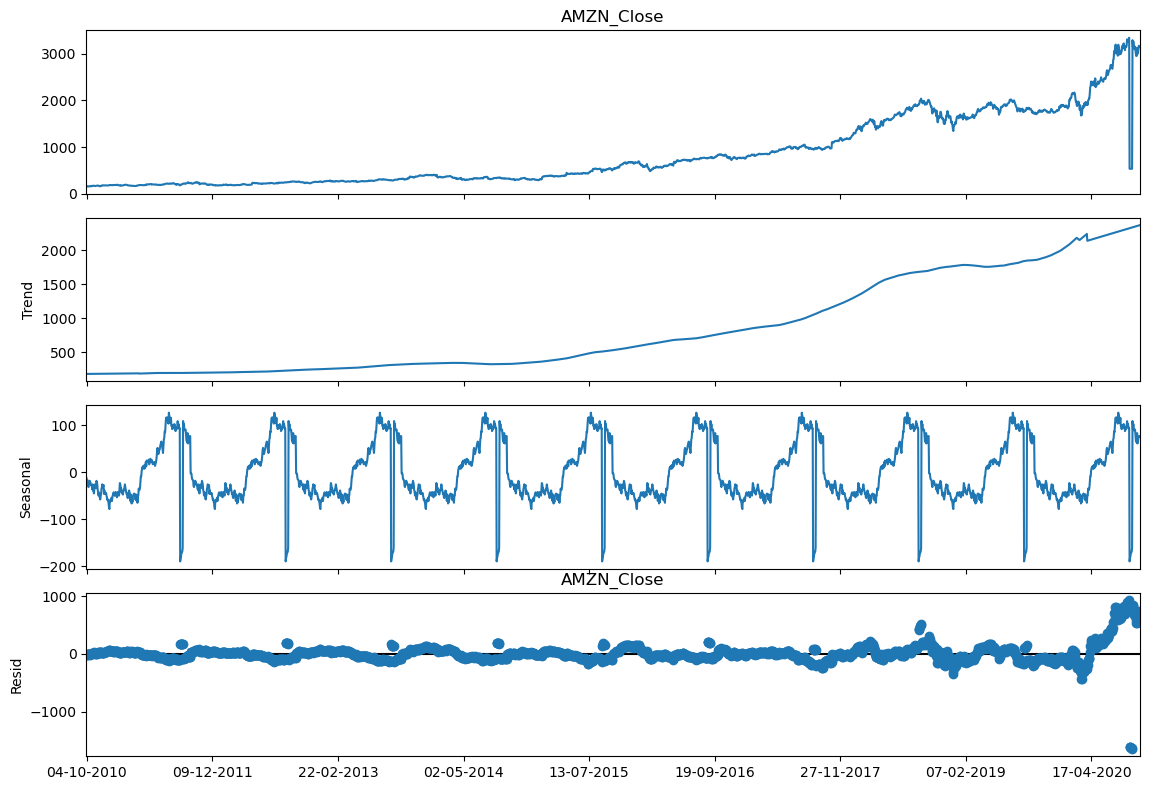

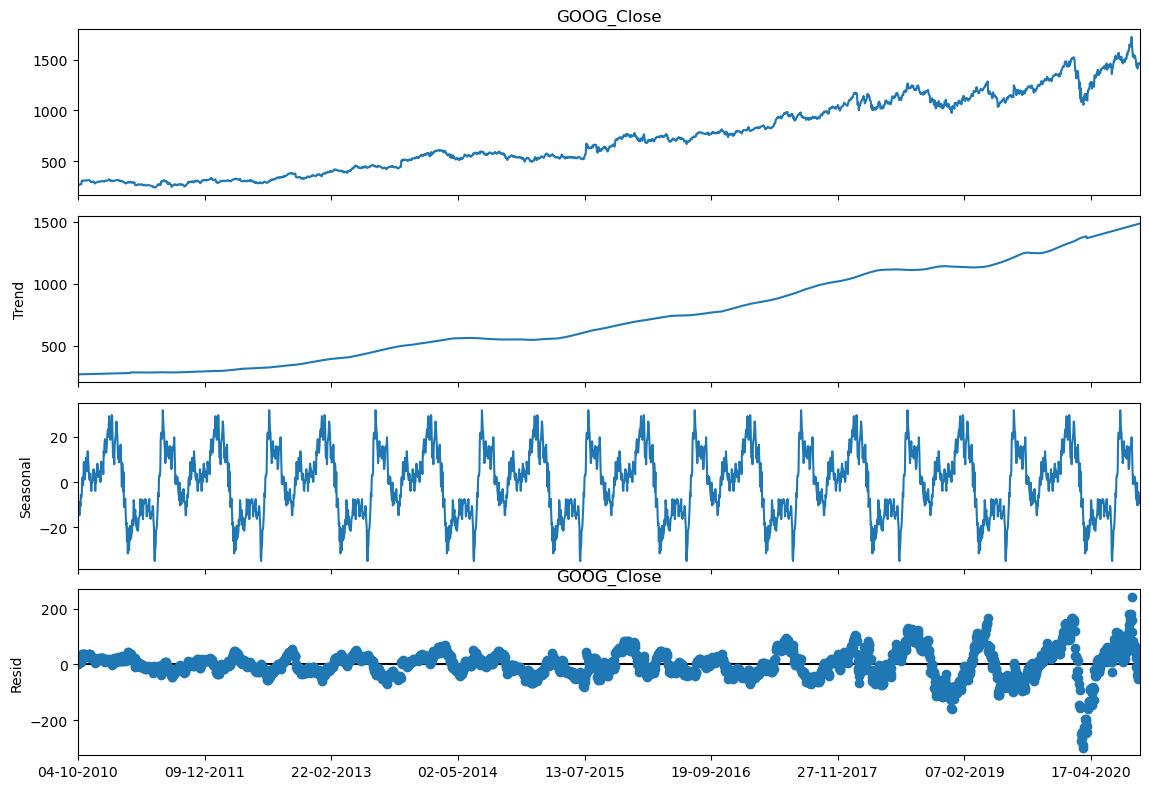

In [140]:
for i in portfolio.columns:
    rcParams['figure.figsize'] = 12, 8
    decomposition = sm.tsa.seasonal_decompose(portfolio[i], model='additive',extrapolate_trend='freq', period=252) # additive seasonal index
    fig = decomposition.plot()
    plt.title(i)
    plt.xticks(np.arange(1, 2518, step=300))
    plt.show()

Train Test Split

In [141]:
# Keeping 70% values as train
train_len = int(portfolio.shape[0]*0.7)
test_len = int(portfolio.shape[0]) - int(portfolio.shape[0]*0.7)

# Train data
train_data = portfolio[:train_len] 

# Test data
test_data = portfolio[train_len:]

Holt's method with trend

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 126.5619206666666, 'initial_trend': 0.6571719696969773, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  GS_Close - 67.93 
 MAPE-  GS_Close - 29.65 



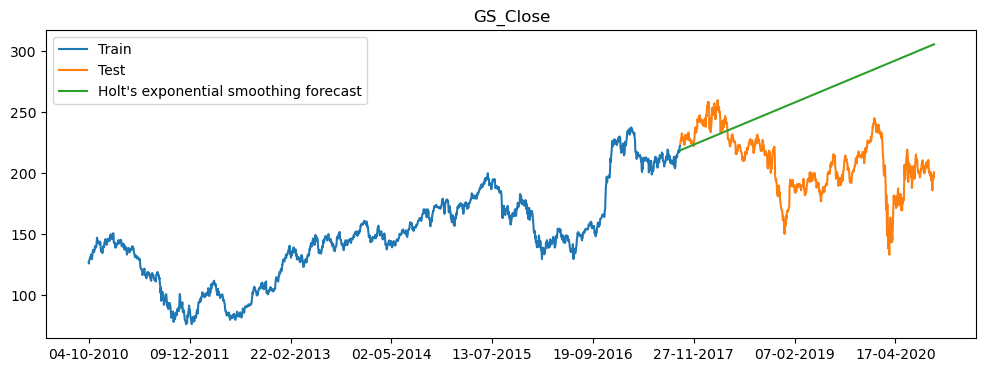

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 46.041089533333306, 'initial_trend': 0.15344801212121473, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  JNJ_Close - 12.65 
 MAPE-  JNJ_Close - 8.48 



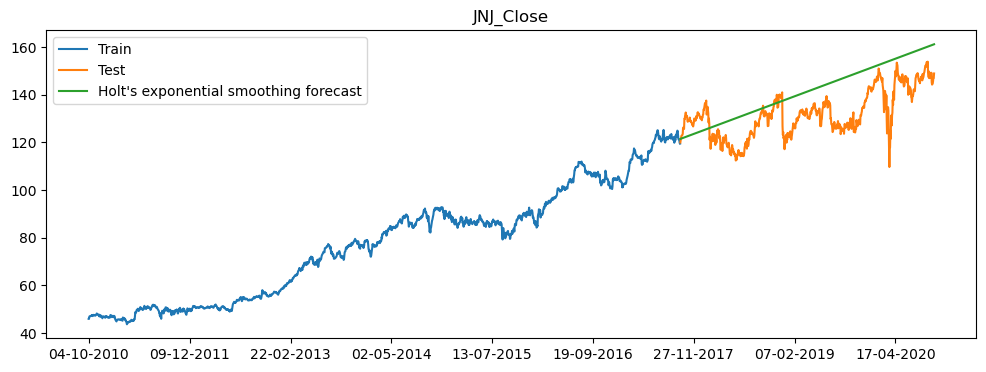

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 26.06319206666665, 'initial_trend': 0.03140647878788022, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  MRK_Close - 7.51 
 MAPE-  MRK_Close - 9.52 



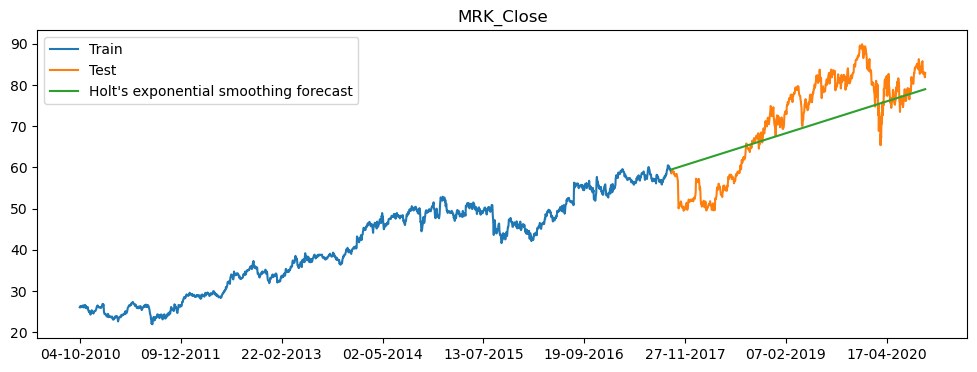

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 8.596970266666663, 'initial_trend': 0.07481175151515206, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  AAPL_Close - 14.2 
 MAPE-  AAPL_Close - 26.71 



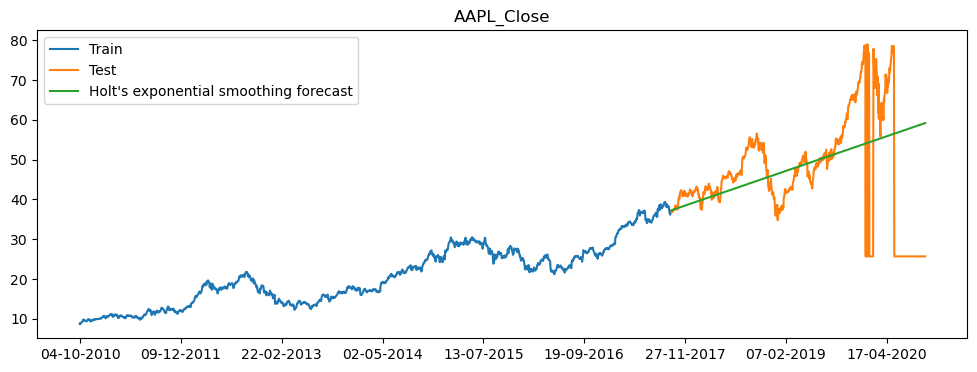

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 156.23800139999992, 'initial_trend': -0.09054581818180552, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  AMZN_Close - 848.07 
 MAPE-  AMZN_Close - 38.06 



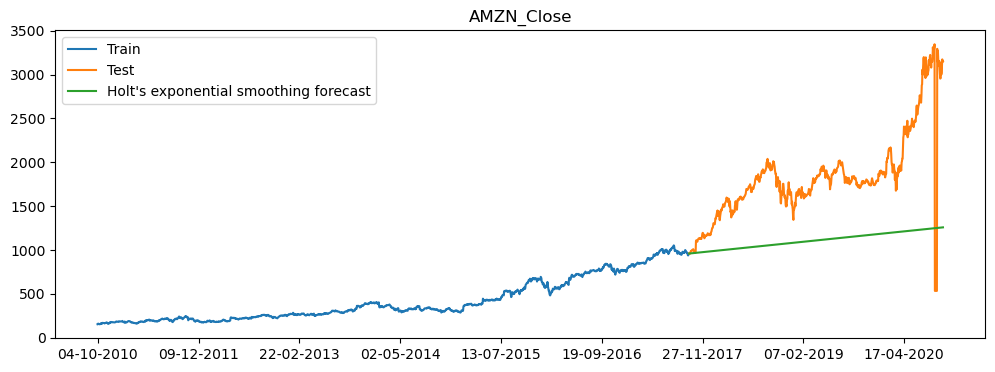

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 261.2550879333332, 'initial_trend': 0.9662257757575903, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  GOOG_Close - 129.05 
 MAPE-  GOOG_Close - 8.08 



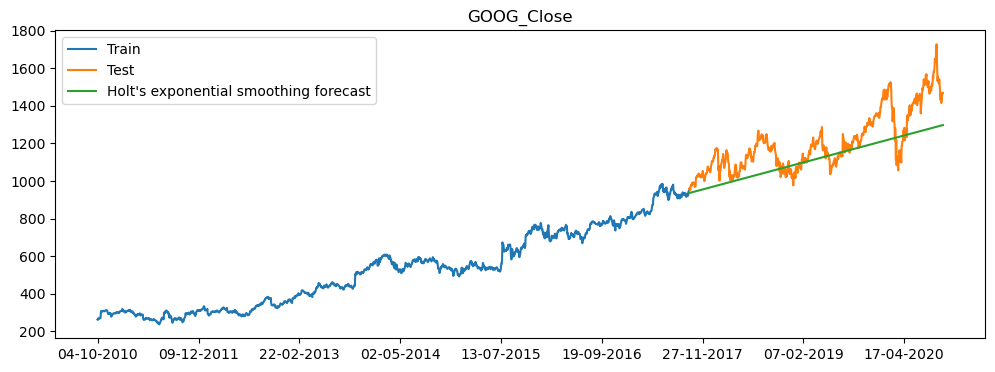

In [142]:
for i in portfolio.columns:
    model = ExponentialSmoothing(np.asarray(train_data[i]) ,seasonal_periods= 252 ,trend='additive', seasonal=None)
    model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
    print(model_fit.params,"\n")
    y_hat_holt = test_data.copy()
    y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_data))
    
    rmse = np.sqrt(mean_squared_error(test_data[i], y_hat_holt['holt_forecast'])).round(2)
    mape = np.round(np.mean(np.abs(test_data[i]-y_hat_holt['holt_forecast'])/test_data[i])*100,2)
    print("RMSE- ",i,"-", rmse,"\n","MAPE- ",i,"-", mape,"\n")
    
    plt.figure(figsize=(12,4))
    plt.plot( train_data[i], label='Train')
    plt.plot(test_data[i], label='Test')
    plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
    plt.legend(loc='best')
    plt.xticks(np.arange(1, 2518, step=300))
    plt.title(i)
    plt.show()

Holt Winters method with trend & seasonality

RMSE-  GS_Close - 53.01 
 MAPE-  GS_Close - 22.95 



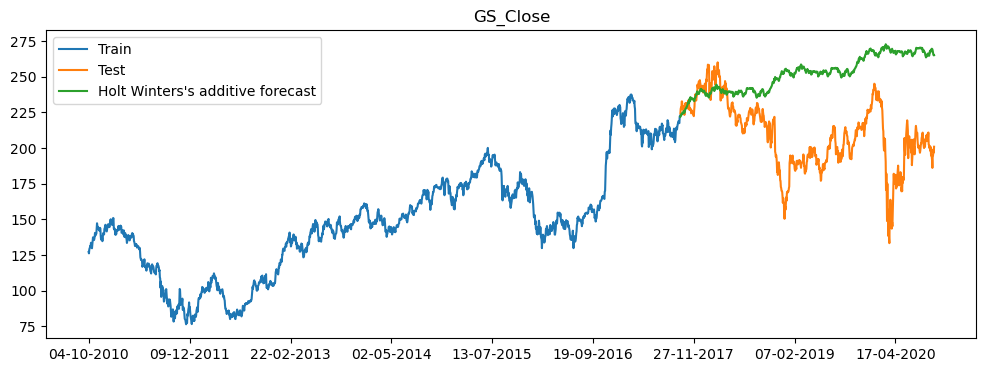

RMSE-  JNJ_Close - 8.96 
 MAPE-  JNJ_Close - 5.71 



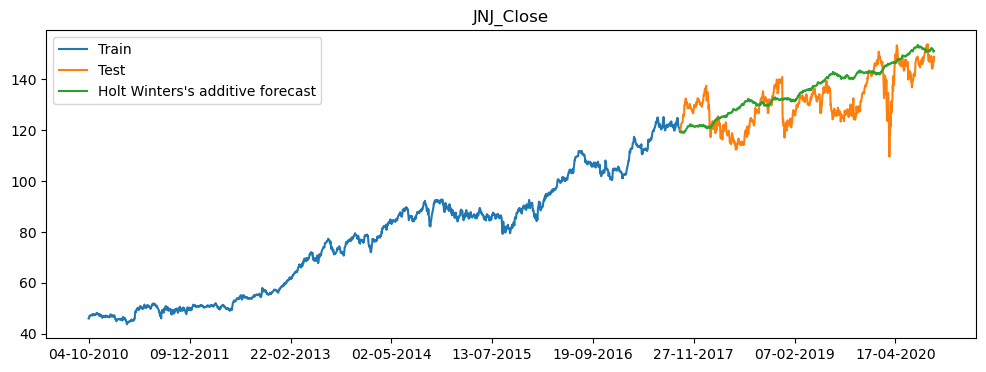

RMSE-  MRK_Close - 9.47 
 MAPE-  MRK_Close - 11.83 



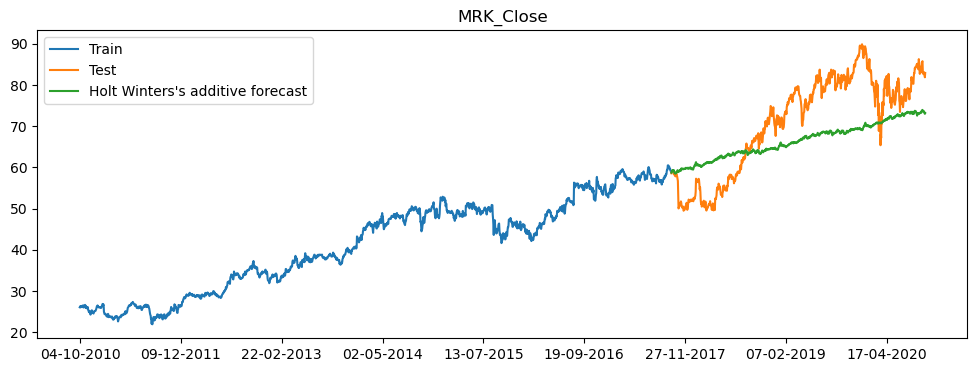

RMSE-  AAPL_Close - 14.09 
 MAPE-  AAPL_Close - 25.99 



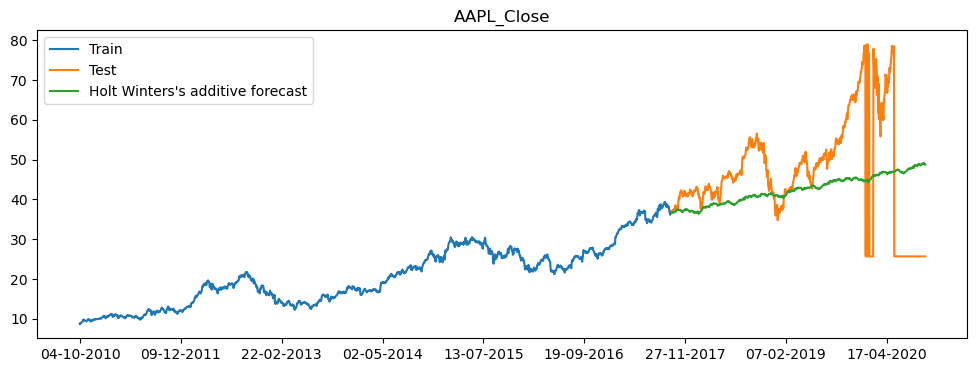

RMSE-  AMZN_Close - 864.74 
 MAPE-  AMZN_Close - 38.91 



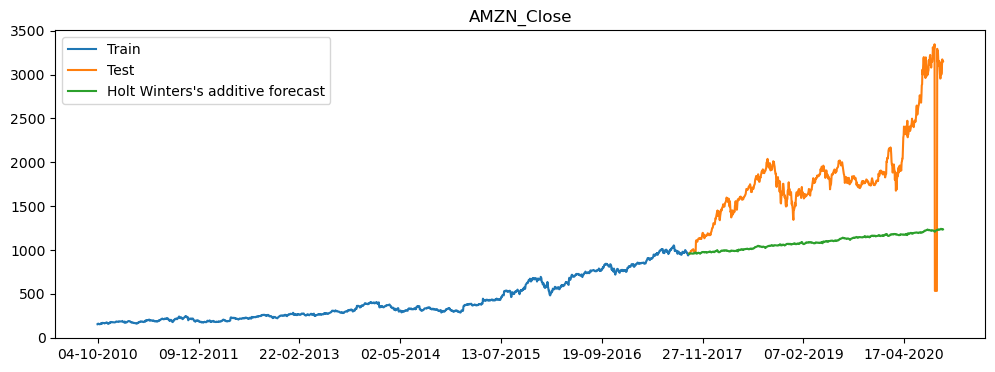

RMSE-  GOOG_Close - 92.78 
 MAPE-  GOOG_Close - 6.24 



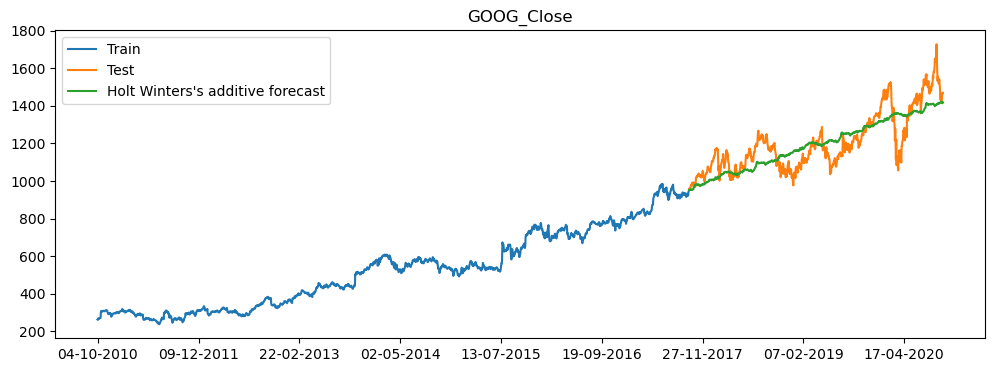

In [143]:
for i in portfolio.columns:
    y_hat_hwa = test_data.copy()
    model = ExponentialSmoothing(np.asarray(train_data[i]) ,seasonal_periods=252 ,trend='add', seasonal='add')
    model_fit = model.fit(optimized=True)
    #print(model_fit.params)
    y_hat_hwa['hw_forecast'] = model_fit.forecast(756)

    rmse = np.sqrt(mean_squared_error(test_data[i], y_hat_hwa['hw_forecast'])).round(2)
    mape = np.round(np.mean(np.abs(test_data[i]-y_hat_hwa['hw_forecast'])/test_data[i])*100,2)
    print("RMSE- ",i,"-", rmse,"\n",
              "MAPE- ",i,"-", mape,"\n")
    
    plt.figure(figsize=(12,4))
    plt.plot( train_data[i], label='Train')
    plt.plot(test_data[i], label='Test')
    plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
    plt.legend(loc='best')
    plt.xticks(np.arange(1, 2518, step=300))
    #plt.title('Holt Winters\' Additive Method',i)
    plt.title(i)
    plt.show()

Stationarity Test

In [144]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in portfolio.columns:
    kpss_test = kpss(portfolio[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')
    
#All the series are statioinary

GS_Close
KPSS Statistic: 6.003116
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

JNJ_Close
KPSS Statistic: 8.049319
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

MRK_Close
KPSS Statistic: 7.444294
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

AAPL_Close
KPSS Statistic: 6.481267
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

AMZN_Close
KPSS Statistic: 7.115730
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

GOOG_Close
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------



Vector autoregression (VAR)

In [145]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

model = VAR(train_data)

In [146]:
# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [147]:
# Providing maxlags as 1 (minimum AIC vaue)
results = model.fit(maxlags = 1, ic = 'aic') 

In [148]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     22:32:12
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    4.16085
Nobs:                     1760.00    HQIC:                   4.07851
Log likelihood:          -18488.6    FPE:                    56.2749
AIC:                      4.03025    Det(Omega_mle):         54.9504
--------------------------------------------------------------------
Results for equation GS_Close
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.032319         0.286977           -0.113           0.910
L1.GS_Close           0.994655         0.002574          386.489           0.000
L1.JNJ_Close         -0.001561         0.014758          

In [149]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = 1

In [150]:
# Obtaining the forecast values
predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = portfolio.index[train_len:], columns = portfolio.columns)

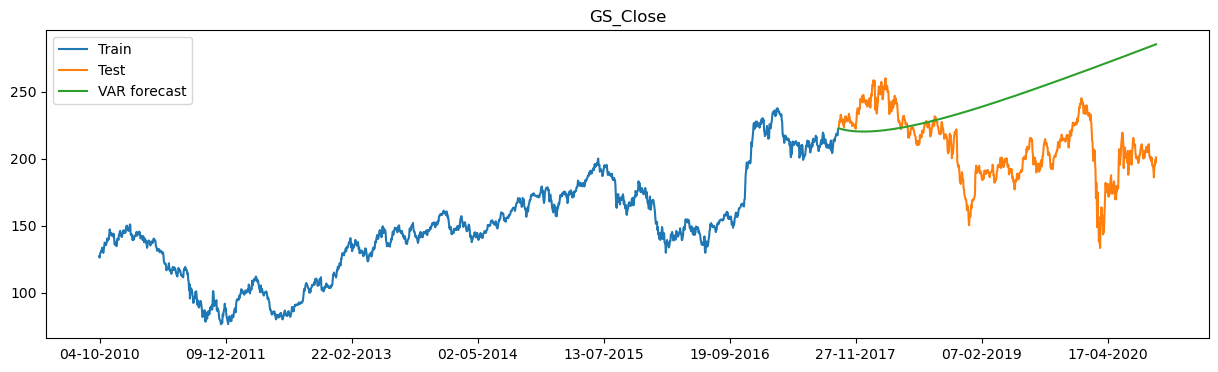

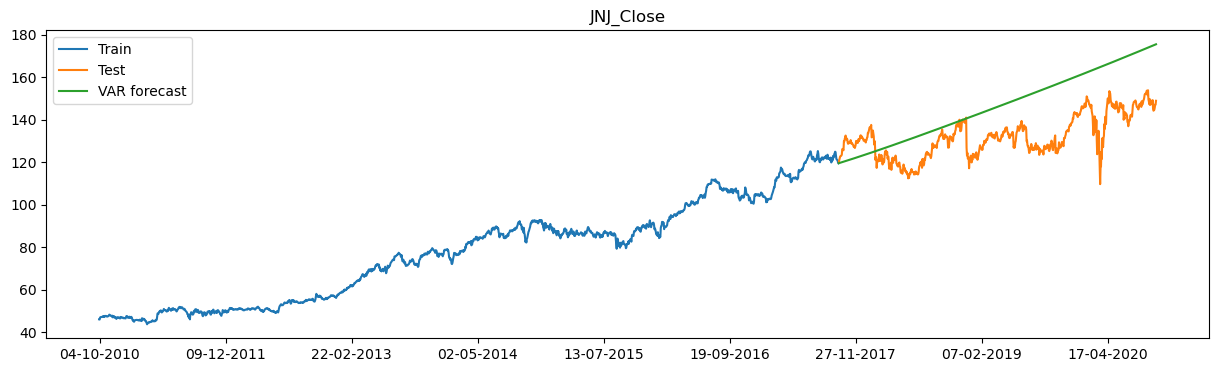

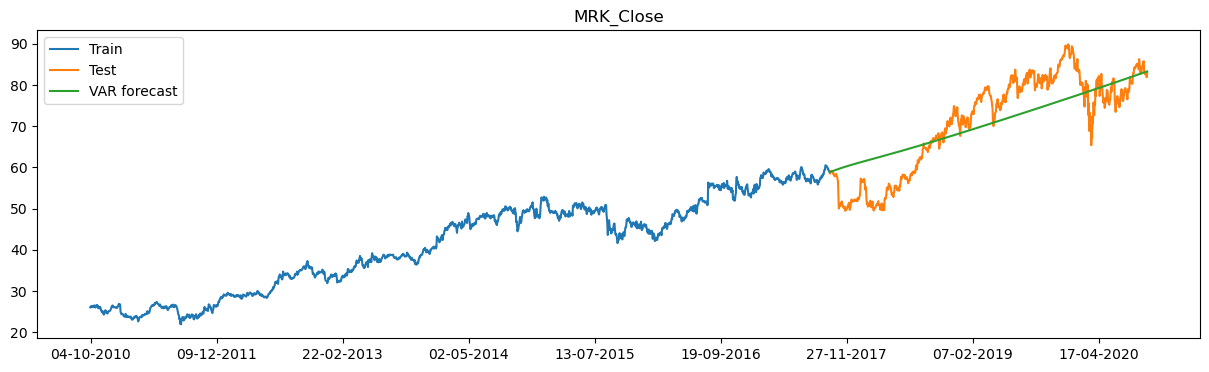

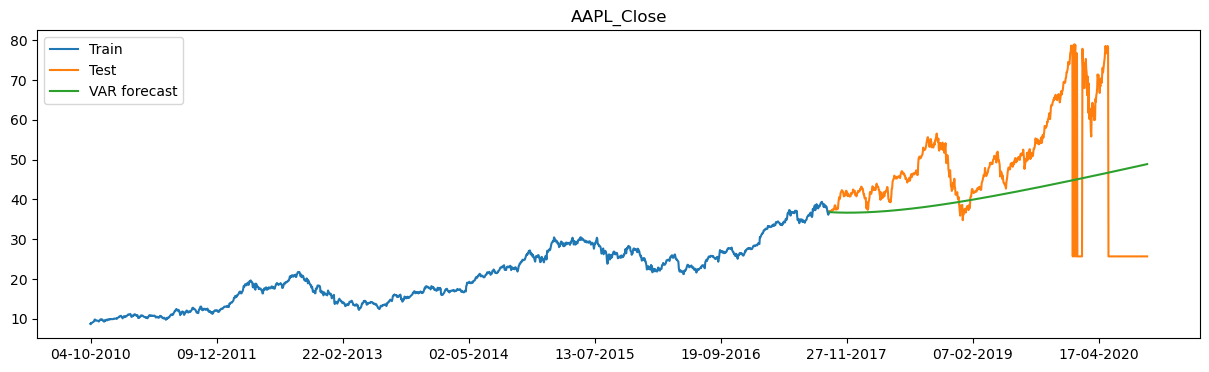

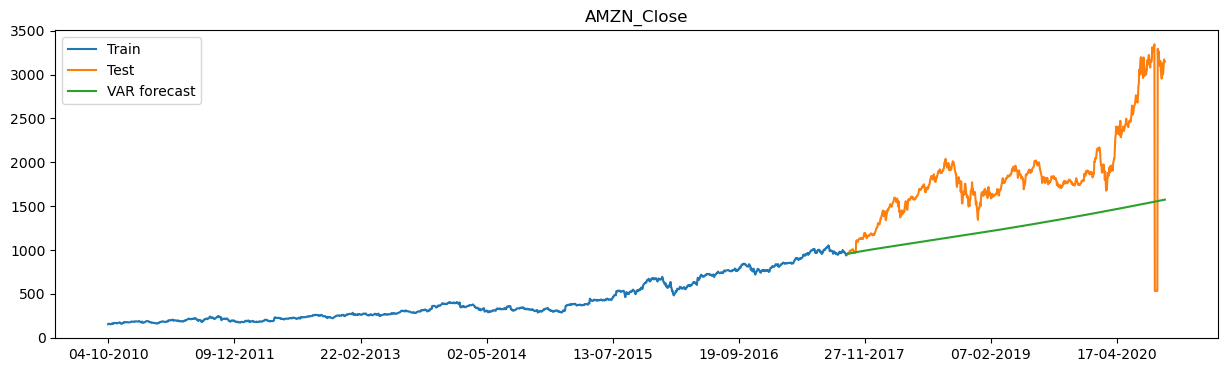

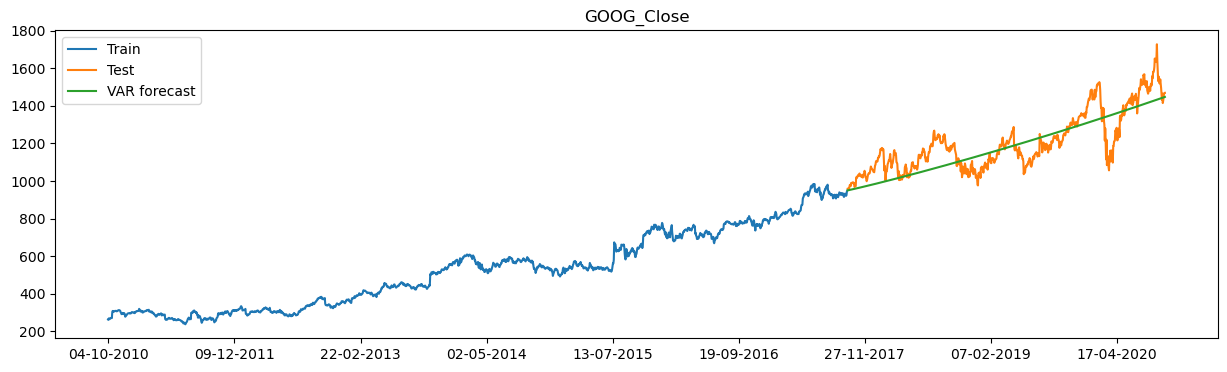

In [151]:
# Printing the train, test and forecasted values
for col in portfolio.columns:
    plt.figure(figsize=(15,4))
    plt.plot(portfolio[col][:train_len], label='Train')
    plt.plot(portfolio[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.xticks(np.arange(1, 2518, step=300))
    plt.title(col)
    plt.show()

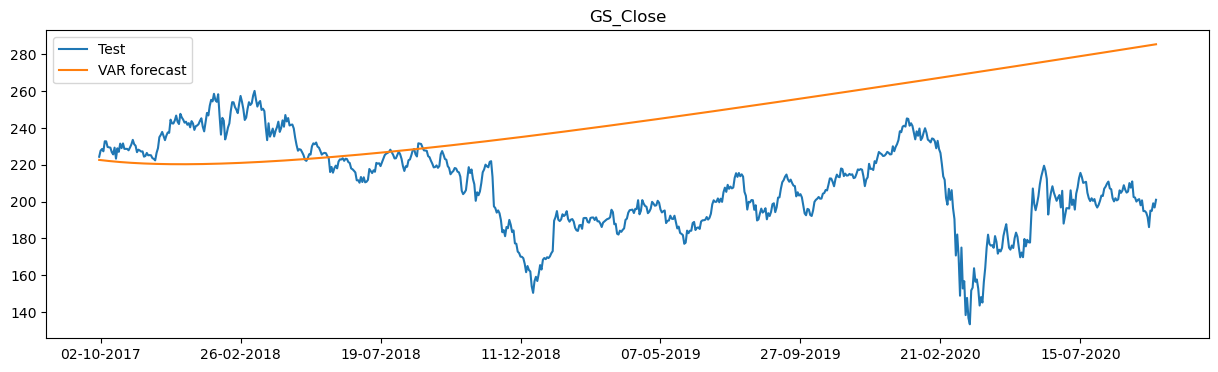

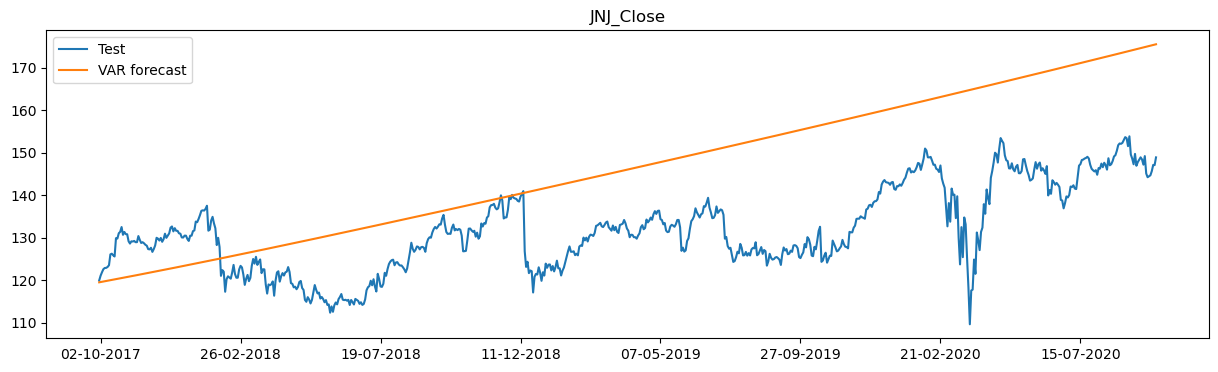

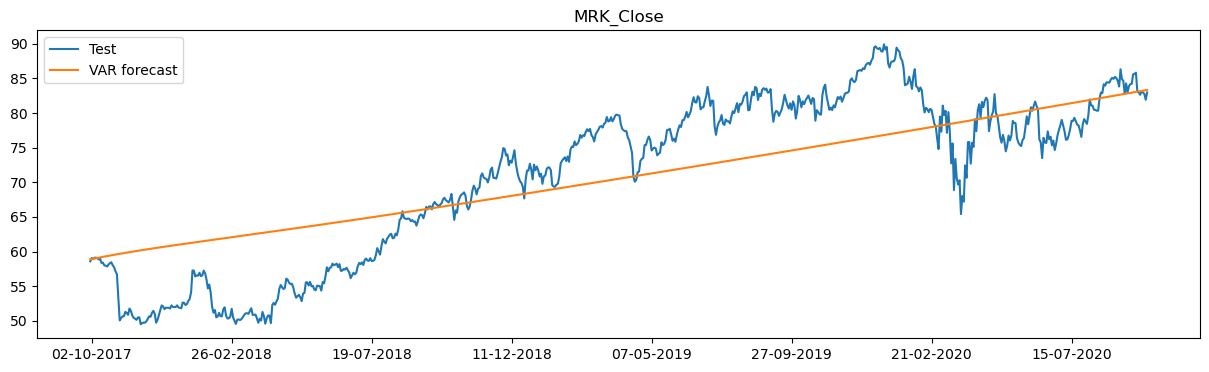

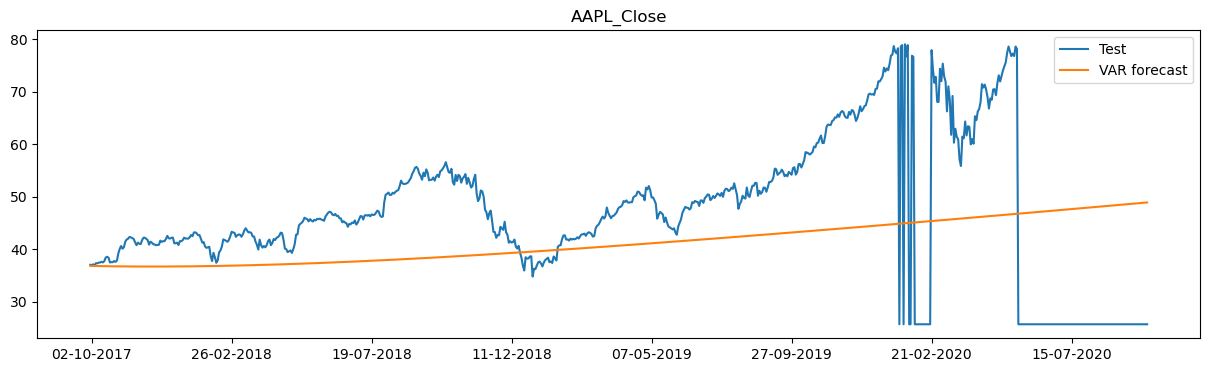

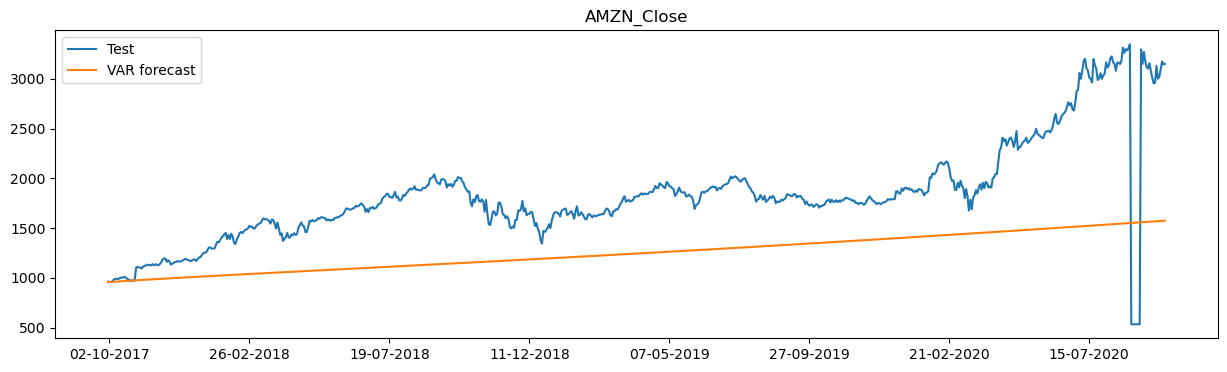

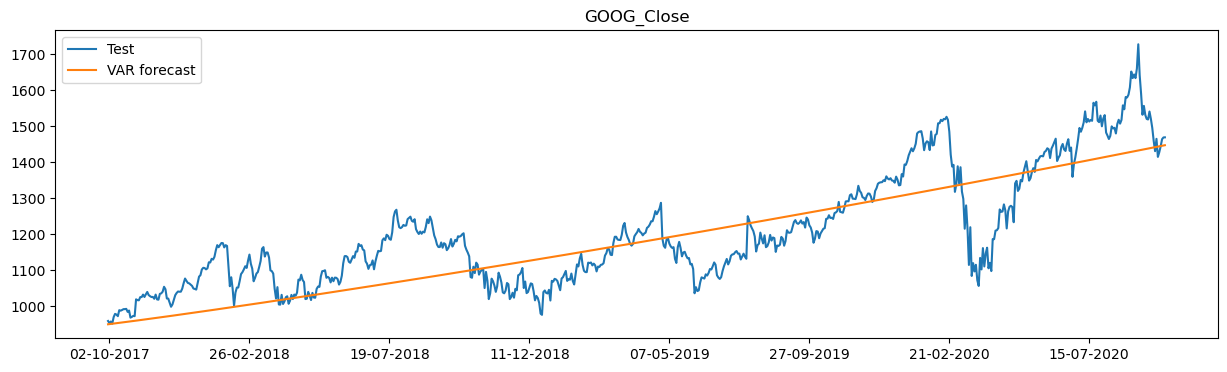

In [152]:
# Comparing the test and forecasted values
for col in portfolio.columns:
    plt.figure(figsize=(15,4))
    plt.plot(portfolio[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.xticks(np.arange(1, 800, step=100))
    plt.show()

In [153]:

# Model Evaluation
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in portfolio.columns:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

#MAPE values are good suggesting model is accurate

Column    RMSE   MAPE
0    GS_Close   52.45  22.38
0   JNJ_Close   18.71  12.40
0   MRK_Close    6.66   8.54
0  AAPL_Close   14.77  28.11
0  AMZN_Close  697.72  31.50
0  GOOG_Close   92.67   6.23

In [154]:
portfolio.describe()

GS_Close    JNJ_Close    MRK_Close   AAPL_Close   AMZN_Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean    166.665287    93.859400    50.180250    28.631929   846.548332   
std      43.999974    31.834527    17.593225    15.399768   732.744273   
min      76.414085    43.686241    21.931190     8.599421   153.029999   
25%     139.162918    66.644791    36.045670    16.853184   266.489990   
50%     164.142197    89.460175    49.284191    25.673811   533.750000   
75%     204.169312   123.004646    58.247047    38.215702  1482.920044   
max     260.138916   153.830002    89.912033    79.032265  3346.489990   

        GOOG_Close  
count  2517.000000  
mean    730.426139  
std     364.685720  
min     236.553345  
25%     403.642059  
50%     651.789978  
75%    1055.810059  
max    1728.280029

Predicting Complete Portfolio Return

Creating Train Test Split from Portfolio Cummulative Returns Data

In [155]:
# Keeping 70% values as train
train_len1 = int(Cumulative_returns_daily.shape[0]*0.7)
test_len1 = int(Cumulative_returns_daily.shape[0]) - int(Cumulative_returns_daily.shape[0]*0.7)

# Train data
train_data1 = Cumulative_returns_daily[:train_len1] 

# Test data
test_data1 = Cumulative_returns_daily[train_len1:]

train_data1 = train_data1.dropna(axis=0)

Predicting Portfolio Returns Using Holt's Method

{'smoothing_level': 0.5, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1.0063331244533535, 'initial_trend': 1.0006136182218488, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

RMSE-  Portfolio Returns - 0.22 
 MAPE-  Portfolio Returns - 4.57 



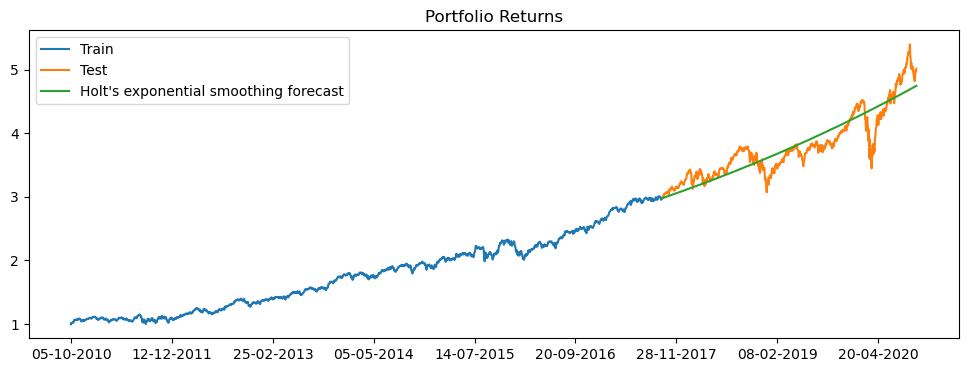

In [156]:
model = ExponentialSmoothing(np.asarray(train_data1['Portfolio_Daily_Return']) ,seasonal_periods= 252 ,trend='multiplicative', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.0001)### Vector autoregression (VAR), optimized=False)
print(model_fit.params,"\n")
y_hat_holt = test_data1.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_data1))
    
rmse = np.sqrt(mean_squared_error(test_data1['Portfolio_Daily_Return'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data1['Portfolio_Daily_Return']-y_hat_holt['holt_forecast'])/test_data1['Portfolio_Daily_Return'])*100,2)
print("RMSE- ","Portfolio Returns","-", rmse,"\n","MAPE- ","Portfolio Returns","-", mape,"\n")
    
plt.figure(figsize=(12,4))
plt.plot( train_data1['Portfolio_Daily_Return'], label='Train')
plt.plot(test_data1['Portfolio_Daily_Return'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.xticks(np.arange(1, 2518, step=300))
plt.title("Portfolio Returns")
plt.show()

Predicting Portfolio Returns Using Holt's Winter Method

RMSE-  Portfolio Returns - 0.49 
 MAPE-  Portfolio Returns - 9.07 



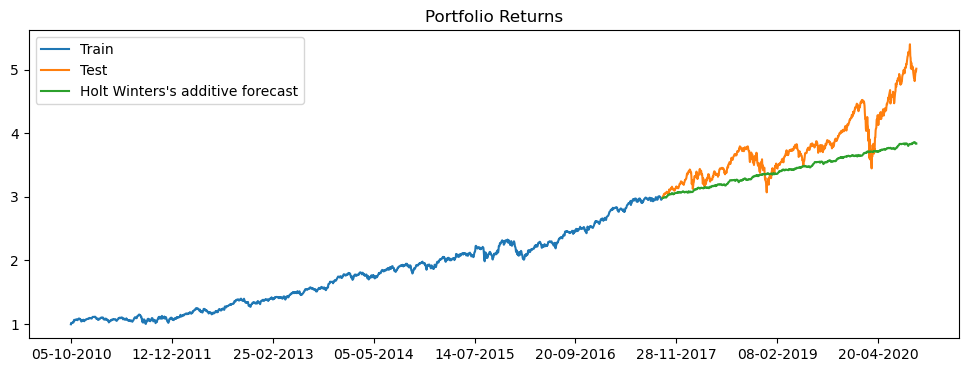

In [157]:
y_hat_hwa = test_data1.copy()
model = ExponentialSmoothing(np.asarray(train_data1["Portfolio_Daily_Return"]) ,seasonal_periods=252 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
#print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(756)

rmse = np.sqrt(mean_squared_error(test_data1["Portfolio_Daily_Return"], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data1["Portfolio_Daily_Return"]-y_hat_hwa['hw_forecast'])/test_data1["Portfolio_Daily_Return"])*100,2)
print("RMSE- ","Portfolio Returns","-", rmse,"\n",
              "MAPE- ","Portfolio Returns","-", mape,"\n")
plt.figure(figsize=(12,4))
plt.plot( train_data1["Portfolio_Daily_Return"], label='Train')
plt.plot(test_data1["Portfolio_Daily_Return"], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.xticks(np.arange(1, 2518, step=300))
#plt.title('Holt Winters\' Additive Method',i)
plt.title("Portfolio Returns")
plt.show()

Predicting future stock prices & calculating cumulative return from 2020 to 2024 using VAR Model:

In [158]:
#Creating dataset with date range in index column to append with the portfolio dataset.
range = pd.date_range(start=datetime.date(2020, 10, 1), end=datetime.date(2023, 12, 31), freq='D')

# Redefining indexes
res = portfolio.reindex(range)

#Replacing the NAN in new dataset with the value of each stock as on 30-09-2020.
res = res.fillna(portfolio.iloc[len(portfolio)-1]) 
res.head()

GS_Close   JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
2020-10-01  200.970001  148.880005  82.949997   25.673811  3148.72998   
2020-10-02  200.970001  148.880005  82.949997   25.673811  3148.72998   
2020-10-03  200.970001  148.880005  82.949997   25.673811  3148.72998   
2020-10-04  200.970001  148.880005  82.949997   25.673811  3148.72998   
2020-10-05  200.970001  148.880005  82.949997   25.673811  3148.72998   

             GOOG_Close  
2020-10-01  1469.599976  
2020-10-02  1469.599976  
2020-10-03  1469.599976  
2020-10-04  1469.599976  
2020-10-05  1469.599976

In [159]:
#Conacting with the portfolio dataset
portfolio_future =pd.concat([portfolio, res],ignore_index=False)

In [160]:
portfolio_future.index = pd.to_datetime(portfolio_future.index, dayfirst=True)

In [162]:
portfolio_future.tail()

GS_Close   JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
2023-12-27  200.970001  148.880005  82.949997   25.673811  3148.72998   
2023-12-28  200.970001  148.880005  82.949997   25.673811  3148.72998   
2023-12-29  200.970001  148.880005  82.949997   25.673811  3148.72998   
2023-12-30  200.970001  148.880005  82.949997   25.673811  3148.72998   
2023-12-31  200.970001  148.880005  82.949997   25.673811  3148.72998   

             GOOG_Close  
2023-12-27  1469.599976  
2023-12-28  1469.599976  
2023-12-29  1469.599976  
2023-12-30  1469.599976  
2023-12-31  1469.599976

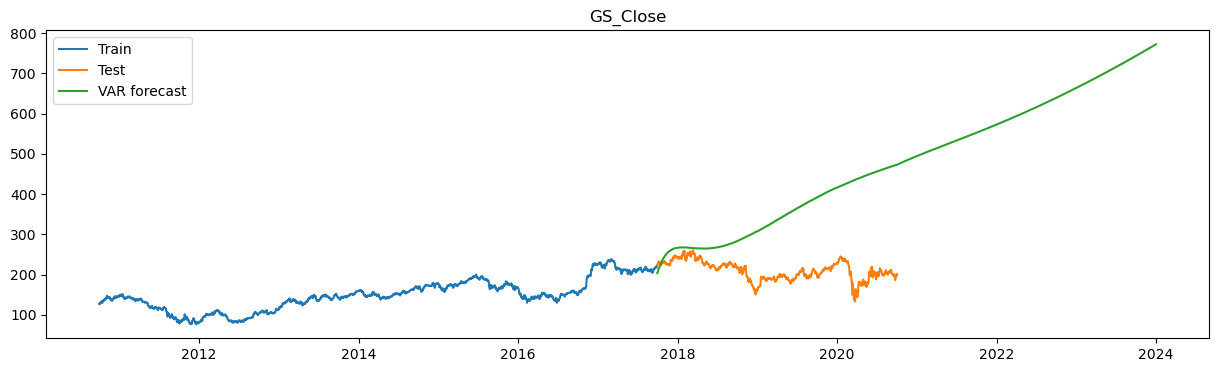

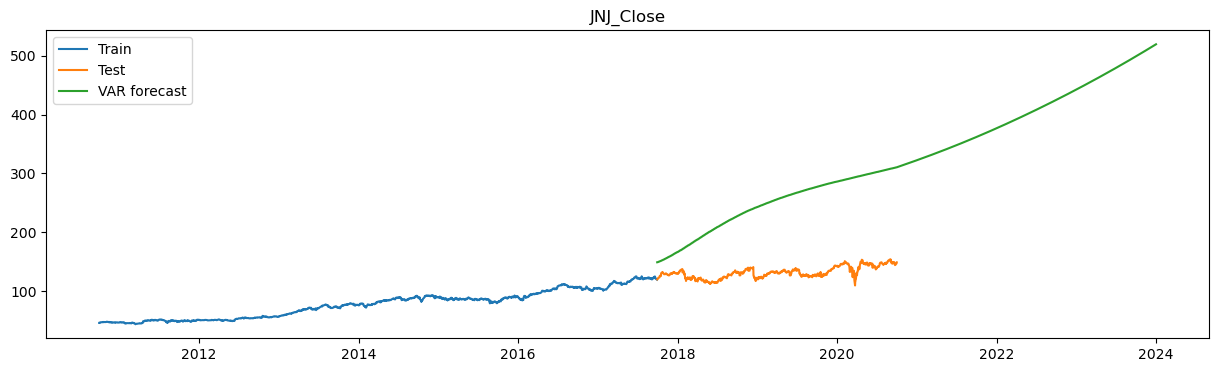

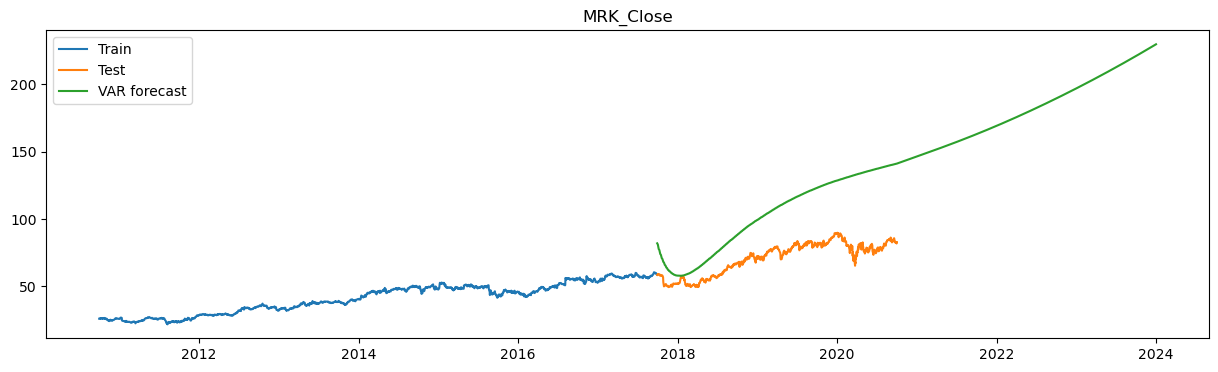

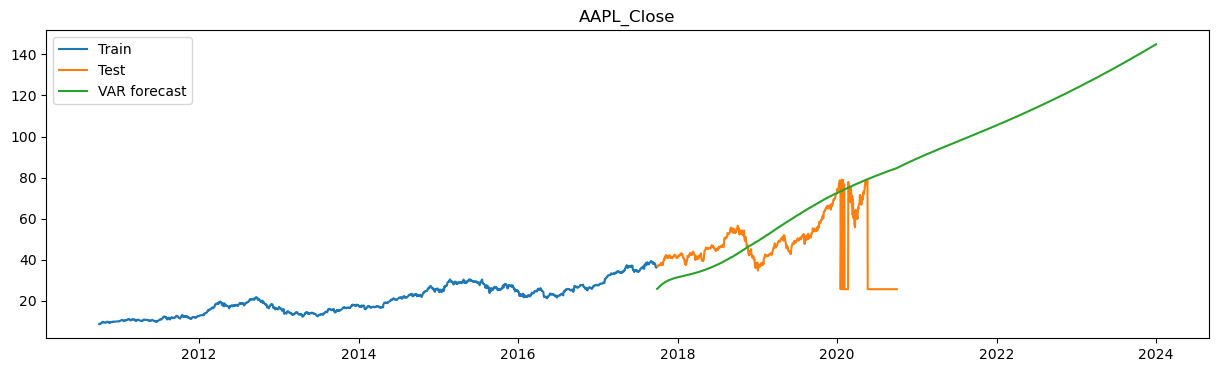

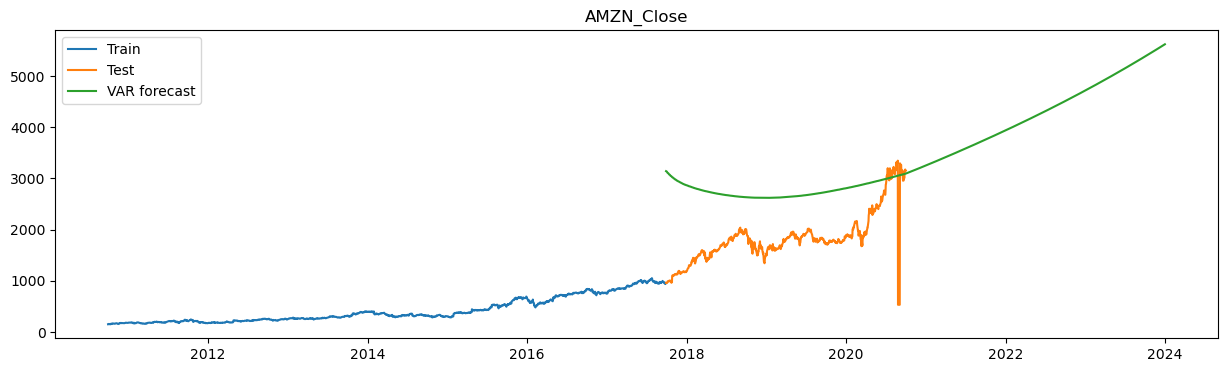

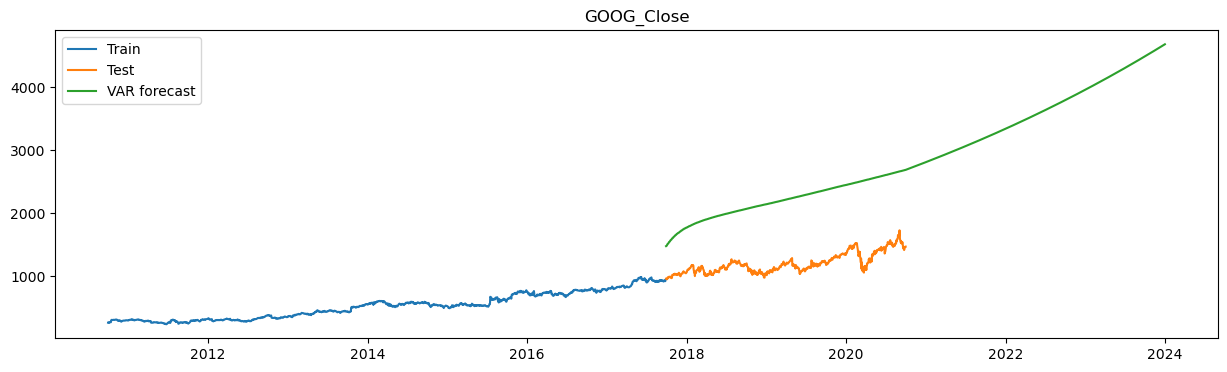

In [163]:
#predicting on the new dataset portfolio_future:

predicted = results.forecast(portfolio_future.values[-lag_order:], 1943)
forecast = pd.DataFrame(predicted, index = portfolio_future.index[train_len:], columns = portfolio_future.columns)

# Printing the train, test and forecasted values
for col in portfolio_future.columns:
    plt.figure(figsize=(15,4))
    plt.plot(portfolio_future[col][:train_len], label='Train')
    plt.plot(portfolio_future[col][train_len:2517], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    #plt.xticks(np.arange(1, 3704, step=200))
    plt.title(col)
    plt.show()

In [164]:
forecast.describe()

GS_Close    JNJ_Close    MRK_Close   AAPL_Close   AMZN_Close  \
count  1943.000000  1943.000000  1943.000000  1943.000000  1943.000000   
mean    507.836187   343.077636   150.968111    90.634275  3685.837545   
std     153.220413    95.718349    46.274811    33.065776   923.463121   
min     203.539356   149.060151    57.912782    25.851651  2620.726379   
25%     384.334654   274.666409   121.504216    65.788363  2816.029382   
50%     520.883025   339.636608   153.769391    94.880092  3475.291225   
75%     631.633705   419.670235   187.320188   117.201835  4445.836070   
max     772.122794   519.554879   229.812582   144.926856  5618.297061   

        GOOG_Close  
count  1943.000000  
mean   3057.990112  
std     837.167547  
min    1476.892118  
25%    2347.822926  
50%    2980.782374  
75%    3743.612377  
max    4681.347230

In [165]:
#Taking predicted prices from 1st Oct 2020 onwards for calulcation cumulative return.

forecast_final = forecast.iloc[756:] 
print(forecast_final.head())
print(forecast_final.shape)

              GS_Close   JNJ_Close   MRK_Close  AAPL_Close   AMZN_Close  \
2020-10-01  472.961482  310.612508  141.256880   84.688139  3095.030312   
2020-10-02  473.211049  310.740659  141.315738   84.741741  3096.703225   
2020-10-03  473.460223  310.868849  141.374560   84.795258  3098.377326   
2020-10-04  473.709007  310.997078  141.433347   84.848691  3100.052607   
2020-10-05  473.957404  311.125348  141.492099   84.902038  3101.729063   

             GOOG_Close  
2020-10-01  2688.827082  
2020-10-02  2690.133585  
2020-10-03  2691.440509  
2020-10-04  2692.747856  
2020-10-05  2694.055627  
(1187, 6)


In [166]:
# Daily return from each stock 
return_stocks = forecast_final.pct_change()
return_stocks.tail(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  GOOG_Close
2023-12-27  0.000416   0.000438   0.000421    0.000438    0.000475    0.000456
2023-12-28  0.000416   0.000438   0.000421    0.000438    0.000475    0.000456
2023-12-29  0.000416   0.000438   0.000421    0.000438    0.000475    0.000456
2023-12-30  0.000416   0.000438   0.000421    0.000438    0.000475    0.000456
2023-12-31  0.000416   0.000438   0.000421    0.000438    0.000475    0.000456

In [167]:
# Average daily return from each stock
daily_returns_mean = return_stocks.mean()
print(daily_returns_mean)

GS_Close      0.000413
JNJ_Close     0.000434
MRK_Close     0.000410
AAPL_Close    0.000453
AMZN_Close    0.000503
GOOG_Close    0.000468
dtype: float64


In [168]:
# Portfolio daily returns
return_stocks['Portfolio_Daily_Return'] = return_stocks.dot(initial_weight)
return_stocks.tail(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
2023-12-27  0.000416   0.000438   0.000421    0.000438    0.000475   
2023-12-28  0.000416   0.000438   0.000421    0.000438    0.000475   
2023-12-29  0.000416   0.000438   0.000421    0.000438    0.000475   
2023-12-30  0.000416   0.000438   0.000421    0.000438    0.000475   
2023-12-31  0.000416   0.000438   0.000421    0.000438    0.000475   

            GOOG_Close  Portfolio_Daily_Return  
2023-12-27    0.000456                0.000379  
2023-12-28    0.000456                0.000379  
2023-12-29    0.000456                0.000379  
2023-12-30    0.000456                0.000379  
2023-12-31    0.000456                0.000379

In [169]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

GS_Close  JNJ_Close  MRK_Close  AAPL_Close  AMZN_Close  \
2023-12-27  1.629812   1.669752   1.624173    1.708309    1.811816   
2023-12-28  1.630491   1.670484   1.624857    1.709056    1.812678   
2023-12-29  1.631170   1.671215   1.625542    1.709804    1.813539   
2023-12-30  1.631849   1.671947   1.626227    1.710552    1.814402   
2023-12-31  1.632528   1.672679   1.626912    1.711301    1.815264   

            GOOG_Close  Portfolio_Daily_Return  
2023-12-27    1.737862                1.575663  
2023-12-28    1.738655                1.576261  
2023-12-29    1.739449                1.576859  
2023-12-30    1.740243                1.577457  
2023-12-31    1.741037                1.578055

Text(0.5, 1.0, 'Cumulative Daily Return')

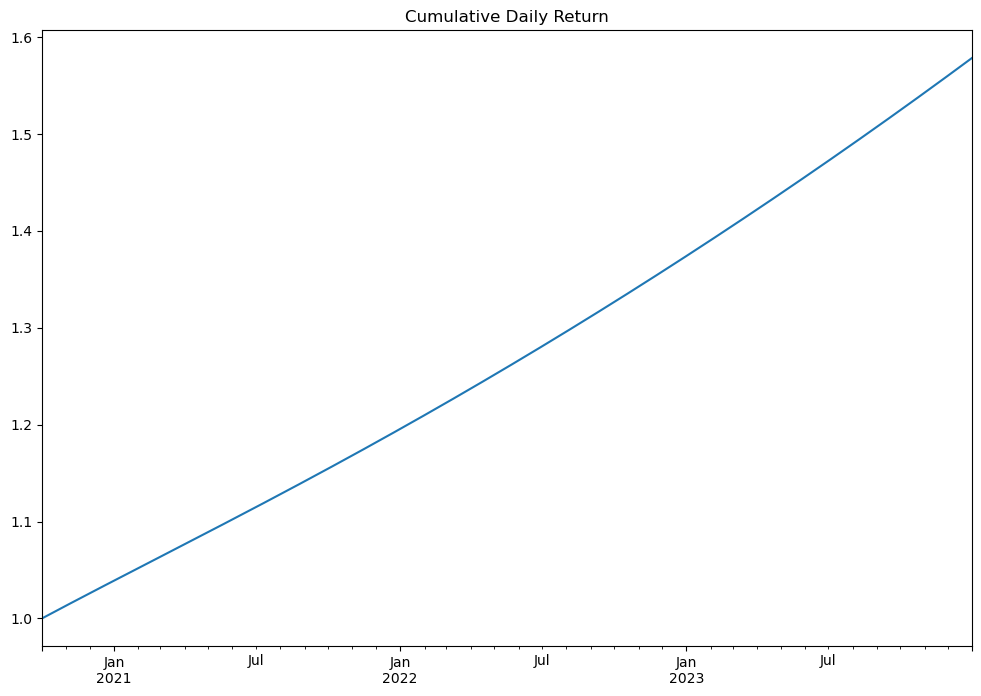

In [170]:
# Plot
Cumulative_returns_daily['Portfolio_Daily_Return'].plot()
plt.title("Cumulative Daily Return")

In [171]:
# Average Cumulative Daily Return by end of 2024.
Cumulative_returns_daily['Portfolio_Daily_Return'].mean()

1.2698633442070923


Portfolio Annualized Return: 12.29 %


Expected Portfolio Annualized Return: 11.81 %
